In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from enum import Enum
import itertools
from datetime import datetime

dataset_dir = "../DataSet_CSVs/BikeDatasets/"

# shared CSV Link: https://docs.google.com/spreadsheets/d/1R4jSAZRnY51854B2PE-Y8L8G4KaLXcE4yR4zDtp-1Tg/edit?usp=sharing

In [2]:
# Import the dataset
bike_df = pd.read_csv(dataset_dir + "final_bike_dataset.csv")
bike_df.drop(["Unnamed: 0"], axis=1, inplace=True)
bike_df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,946D42AD89539210,docked_bike,2020-05-30 17:25:29,2020-05-31 18:25:22,Anacostia Library,31804.0,11th & H St NE,31614.0,38.865784,-76.978400,38.899983,-76.991383,casual
1,CC46FAAB662B8613,docked_bike,2020-05-09 14:42:04,2020-05-09 15:06:33,10th & E St NW,31256.0,21st St & Constitution Ave NW,31261.0,38.895914,-77.026064,38.892459,-77.046567,member
2,72F00B2FB833D6ED,docked_bike,2020-05-24 17:27:19,2020-05-24 17:43:51,Connecticut Ave & Newark St NW / Cleveland Park,31305.0,12th & U St NW,31268.0,38.934267,-77.057979,38.916787,-77.028139,member
3,4DFBE6AED989DF35,docked_bike,2020-05-27 15:29:52,2020-05-27 15:47:13,Connecticut Ave & Newark St NW / Cleveland Park,31305.0,14th & Belmont St NW,31119.0,38.934267,-77.057979,38.921074,-77.031887,casual
4,1AAFE6B4331AB9DF,docked_bike,2020-05-31 14:06:03,2020-05-31 14:30:30,Georgia Ave & Morton St NW,31419.0,17th & K St NW,31213.0,38.932128,-77.023500,38.902760,-77.038630,casual


In [3]:
# Get all the column headers out of the datasheet to a csv
category_list = ["rideable_type", "start_station_name", "end_station_name", "member_casual"]
col_info_list = [[str(col_new), str(bike_df[col_new].dtype), str(bike_df[col_new].isna().sum()), str(len(bike_df[col_new].unique())), str(len(bike_df[col_new].unique()) == len(bike_df[col_new]))] for col_new in bike_df.columns]
with open(dataset_dir + "columns.csv", "w") as colfile:
    [colfile.write(",".join([col, col_dtype, count_sum, count_unique])+"\n") for col, col_dtype, count_sum, count_unique, count_is_unique in col_info_list]

In [4]:
# Print out the head of the dataset
bike_df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,946D42AD89539210,docked_bike,2020-05-30 17:25:29,2020-05-31 18:25:22,Anacostia Library,31804.0,11th & H St NE,31614.0,38.865784,-76.978400,38.899983,-76.991383,casual
1,CC46FAAB662B8613,docked_bike,2020-05-09 14:42:04,2020-05-09 15:06:33,10th & E St NW,31256.0,21st St & Constitution Ave NW,31261.0,38.895914,-77.026064,38.892459,-77.046567,member
2,72F00B2FB833D6ED,docked_bike,2020-05-24 17:27:19,2020-05-24 17:43:51,Connecticut Ave & Newark St NW / Cleveland Park,31305.0,12th & U St NW,31268.0,38.934267,-77.057979,38.916787,-77.028139,member
3,4DFBE6AED989DF35,docked_bike,2020-05-27 15:29:52,2020-05-27 15:47:13,Connecticut Ave & Newark St NW / Cleveland Park,31305.0,14th & Belmont St NW,31119.0,38.934267,-77.057979,38.921074,-77.031887,casual
4,1AAFE6B4331AB9DF,docked_bike,2020-05-31 14:06:03,2020-05-31 14:30:30,Georgia Ave & Morton St NW,31419.0,17th & K St NW,31213.0,38.932128,-77.023500,38.902760,-77.038630,casual


In [5]:
# Print out the dataset information
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 843048 entries, 0 to 843047
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ride_id             843048 non-null  object 
 1   rideable_type       843048 non-null  object 
 2   started_at          843048 non-null  object 
 3   ended_at            843048 non-null  object 
 4   start_station_name  823196 non-null  object 
 5   start_station_id    823196 non-null  float64
 6   end_station_name    817827 non-null  object 
 7   end_station_id      817827 non-null  float64
 8   start_lat           843040 non-null  float64
 9   start_lng           843040 non-null  float64
 10  end_lat             839714 non-null  float64
 11  end_lng             839714 non-null  float64
 12  member_casual       843048 non-null  object 
dtypes: float64(6), object(7)
memory usage: 83.6+ MB


In [6]:
# Describe the df
bike_df.describe()

,start_station_id,end_station_id,start_lat,start_lng,end_lat,end_lng
count,823196.000000,817827.000000,843040.000000,843040.000000,839714.000000,839714.000000
mean,31370.933724,31372.570963,38.903012,-77.034090,38.902007,-77.033655
std,284.064886,284.686370,0.032965,0.037028,0.032690,0.036815
min,31000.000000,31000.000000,38.782629,-77.368416,38.710000,-77.420000
25%,31201.000000,31203.000000,38.888553,-77.048728,38.888553,-77.047844
50%,31275.000000,31275.000000,38.902405,-77.032300,38.902221,-77.032224
75%,31605.000000,31606.000000,38.915544,-77.015970,38.913761,-77.015360
max,32902.000000,32902.000000,39.126000,-76.825535,39.270000,-76.630000


In [7]:
# Drop out the Ride ID
bike_df.drop(["ride_id", "end_station_id"], axis=1, inplace=True)

In [8]:
# Copy off the original df for any future use with the Null values.
copy_bike_df = bike_df.copy()

In [9]:
# Drop the null columns for initial analyses
bike_df.dropna(axis=0, inplace=True)

In [10]:
# Verify the new structure of the data.
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 810549 entries, 0 to 843047
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   rideable_type       810549 non-null  object 
 1   started_at          810549 non-null  object 
 2   ended_at            810549 non-null  object 
 3   start_station_name  810549 non-null  object 
 4   start_station_id    810549 non-null  float64
 5   end_station_name    810549 non-null  object 
 6   start_lat           810549 non-null  float64
 7   start_lng           810549 non-null  float64
 8   end_lat             810549 non-null  float64
 9   end_lng             810549 non-null  float64
 10  member_casual       810549 non-null  object 
dtypes: float64(5), object(6)
memory usage: 74.2+ MB


In [11]:
# The elapsed time on the bike
bike_df["started_at"] = pd.to_datetime(bike_df["started_at"])
bike_df["ended_at"] = pd.to_datetime(bike_df["ended_at"])
bike_df["elapsed_time"] = [((end) - (start)) for start, end in list(zip(bike_df["started_at"], bike_df["ended_at"]))]

In [12]:
# Parse out the date time stamps into separate columns
class dateenum(str, Enum):
    year="year"
    month="month"
    week="week"
    day="day"
    hour="hour"
    day_of_week="dow"
    
# Storage lists to parse out to columns

# Function to archive all the information out of the column
def datetime_lambda_func(input_dt, datetime_col_list):
    datetime_col_list[dateenum.year].append(input_dt.year)
    datetime_col_list[dateenum.month].append(input_dt.month)
    datetime_col_list[dateenum.day].append(input_dt.day)
    datetime_col_list[dateenum.hour].append(input_dt.hour)
    datetime_col_list[dateenum.day_of_week].append(input_dt.day%7)
    datetime_col_list[dateenum.week].append(input_dt.day//7)
    return datetime(input_dt.year, input_dt.month, input_dt.day, input_dt.hour)

# Find the columns with the times
time_list = ["started_at", "ended_at"]

for col in time_list:
    datetime_col_list = {dateenum.year:[], dateenum.month:[], dateenum.week:[], dateenum.day:[], dateenum.hour:[], dateenum.day_of_week:[]}
    bike_df[col] = bike_df[col].apply(lambda l: datetime_lambda_func(l, datetime_col_list))
    for value in [dateenum.year, dateenum.month, dateenum.day, dateenum.hour, dateenum.day_of_week, dateenum.week]:
        bike_df[f"{col}_{value}"] = [int(int_val) for int_val in datetime_col_list[value]]
        bike_df[f"{col}_{value}"] = bike_df[f"{col}_{value}"].astype("int32")
        category_list.append(f"{col}_{value}")
bike_df.head()

,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,start_lat,start_lng,end_lat,end_lng,...,started_at_day,started_at_hour,started_at_dow,started_at_week,ended_at_year,ended_at_month,ended_at_day,ended_at_hour,ended_at_dow,ended_at_week
0,docked_bike,2020-05-30 17:00:00,2020-05-31 18:00:00,Anacostia Library,31804.0,11th & H St NE,38.865784,-76.978400,38.899983,-76.991383,...,30,17,2,4,2020,5,31,18,3,4
1,docked_bike,2020-05-09 14:00:00,2020-05-09 15:00:00,10th & E St NW,31256.0,21st St & Constitution Ave NW,38.895914,-77.026064,38.892459,-77.046567,...,9,14,2,1,2020,5,9,15,2,1
2,docked_bike,2020-05-24 17:00:00,2020-05-24 17:00:00,Connecticut Ave & Newark St NW / Cleveland Park,31305.0,12th & U St NW,38.934267,-77.057979,38.916787,-77.028139,...,24,17,3,3,2020,5,24,17,3,3
3,docked_bike,2020-05-27 15:00:00,2020-05-27 15:00:00,Connecticut Ave & Newark St NW / Cleveland Park,31305.0,14th & Belmont St NW,38.934267,-77.057979,38.921074,-77.031887,...,27,15,6,3,2020,5,27,15,6,3
4,docked_bike,2020-05-31 14:00:00,2020-05-31 14:00:00,Georgia Ave & Morton St NW,31419.0,17th & K St NW,38.932128,-77.023500,38.902760,-77.038630,...,31,14,3,4,2020,5,31,14,3,4


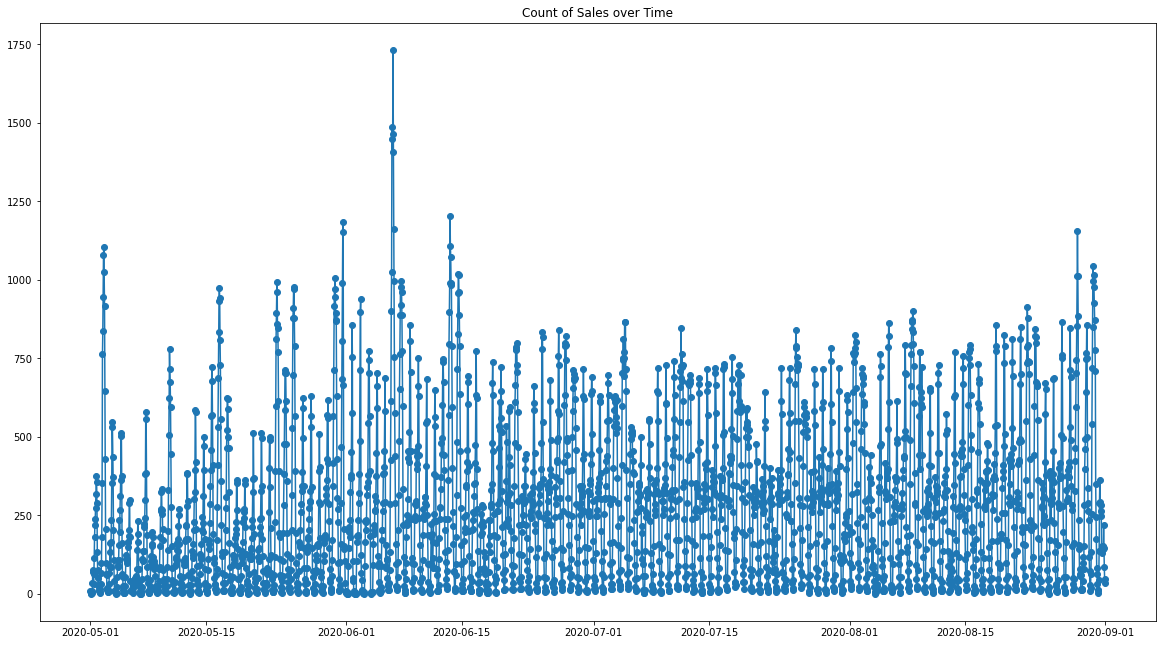

In [13]:
# Plot out the data by datetime
time_bike_df = bike_df.groupby(["started_at"]).size()
plt.figure(figsize=(20, 11))
plt.plot_date(time_bike_df.index, time_bike_df.values, linestyle="solid")
plt.title("Count of Sales over Time")
plt.show()

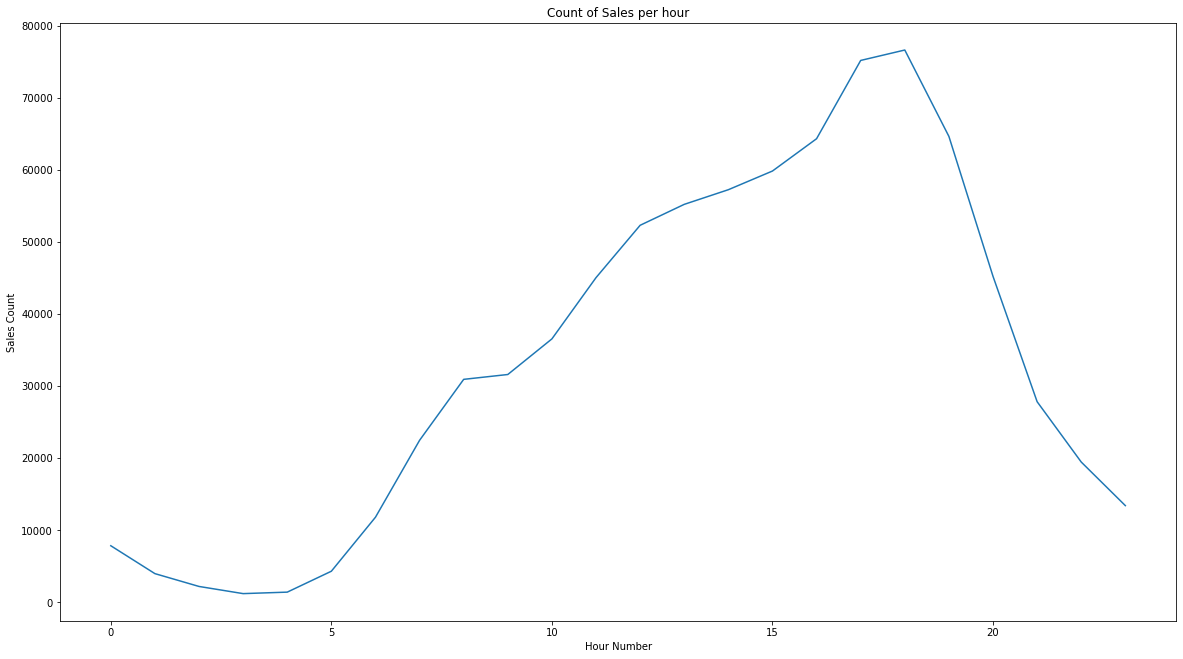

In [14]:
# Plot the distributions over a single day.
hour_bike_df = bike_df.groupby(["started_at_hour"]).size()
plt.figure(figsize=(20, 11))
plt.plot(hour_bike_df.index, hour_bike_df.values, linestyle="solid")
plt.xlabel("Hour Number")
plt.ylabel("Sales Count")
plt.title("Count of Sales per hour")
plt.show()

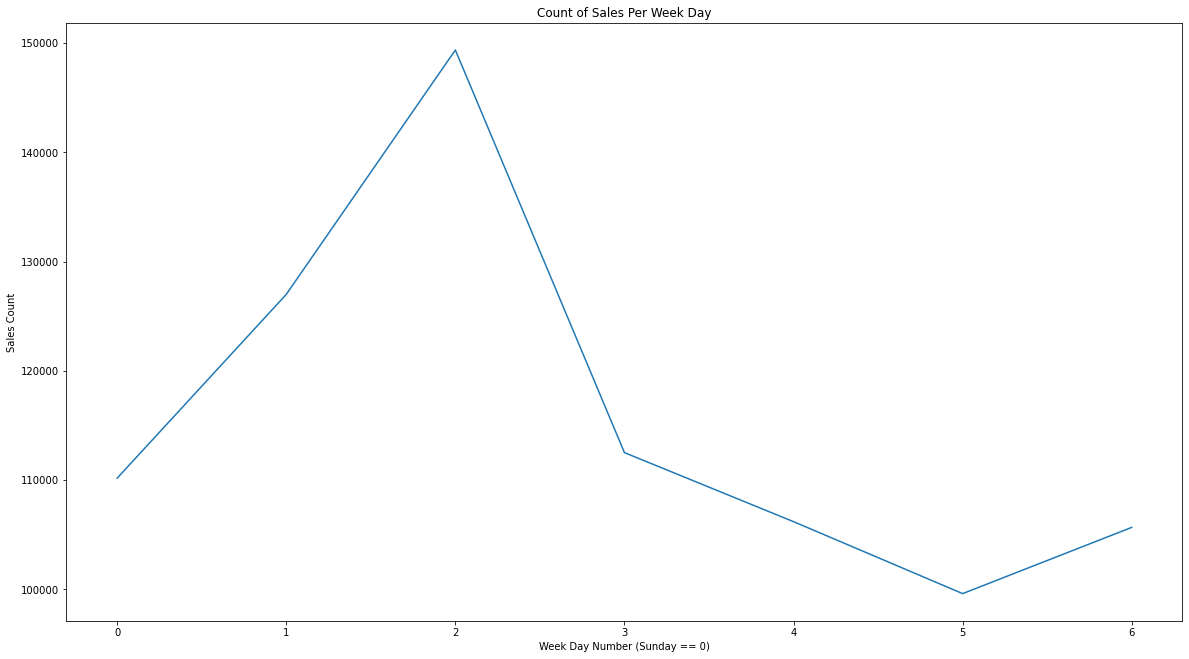

In [15]:
# Plot the distributions over a single day.
hour_bike_df = bike_df.groupby(["started_at_dow"]).size()
plt.figure(figsize=(20, 11))
plt.plot(hour_bike_df.index, hour_bike_df.values, linestyle="solid")
plt.title("Count of Sales Per Week Day")
plt.xlabel("Week Day Number (Sunday == 0)")
plt.ylabel("Sales Count")
plt.show()

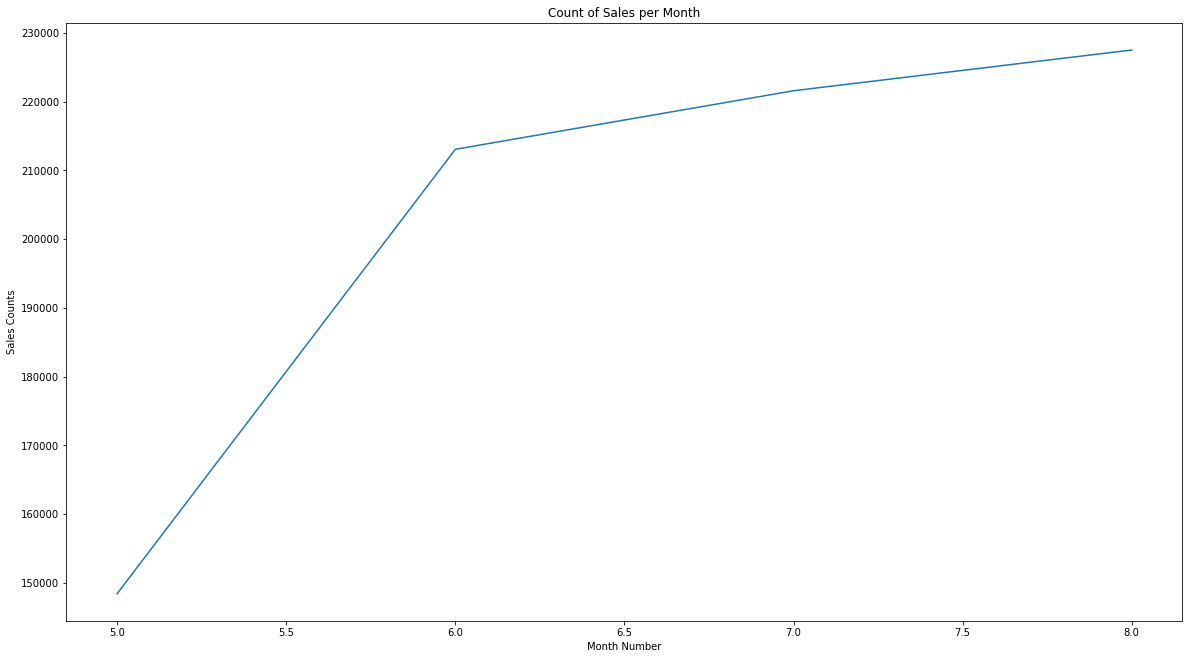

In [16]:
# Plot the distributions over a single day.
hour_bike_df = bike_df.groupby(["started_at_month"]).size()
plt.figure(figsize=(20, 11))
plt.plot(hour_bike_df.index, hour_bike_df.values, linestyle="solid")
plt.title("Count of Sales per Month")
plt.xlabel("Month Number")
plt.ylabel("Sales Counts")
plt.show()

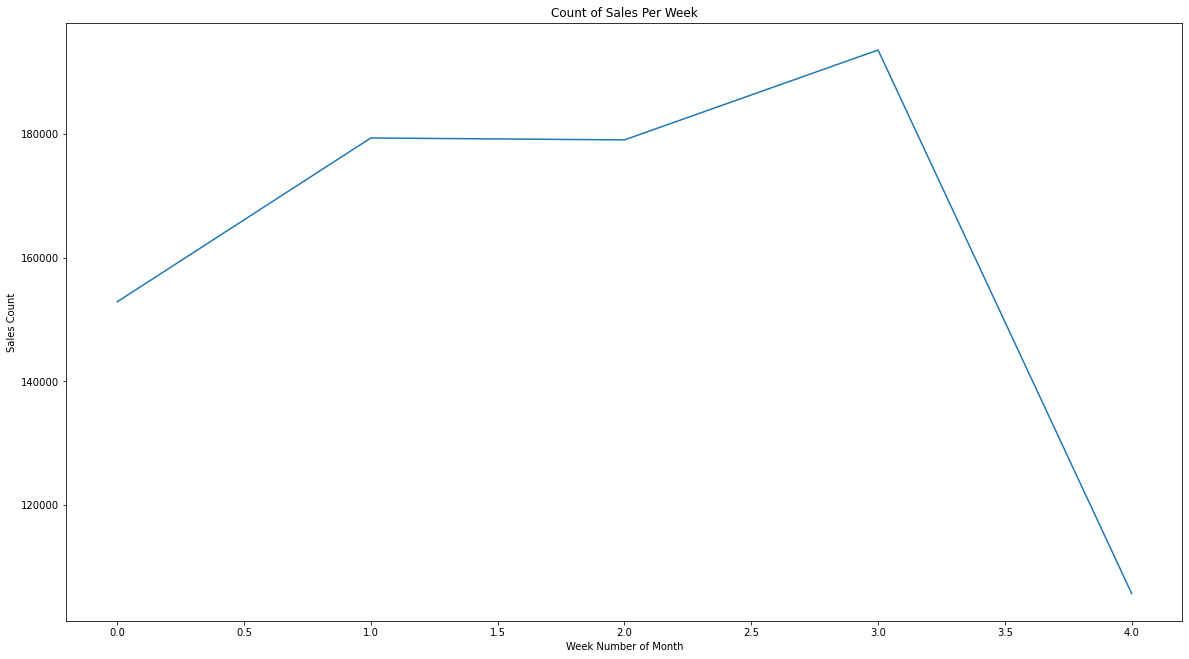

In [17]:
# Plot the distributions over a single day.
hour_bike_df = bike_df.groupby(["started_at_week"]).size()
plt.figure(figsize=(20, 11))
plt.plot(hour_bike_df.index, hour_bike_df.values, linestyle="solid")
plt.title("Count of Sales Per Week")
plt.xlabel("Week Number of Month")
plt.ylabel("Sales Count")
plt.show()

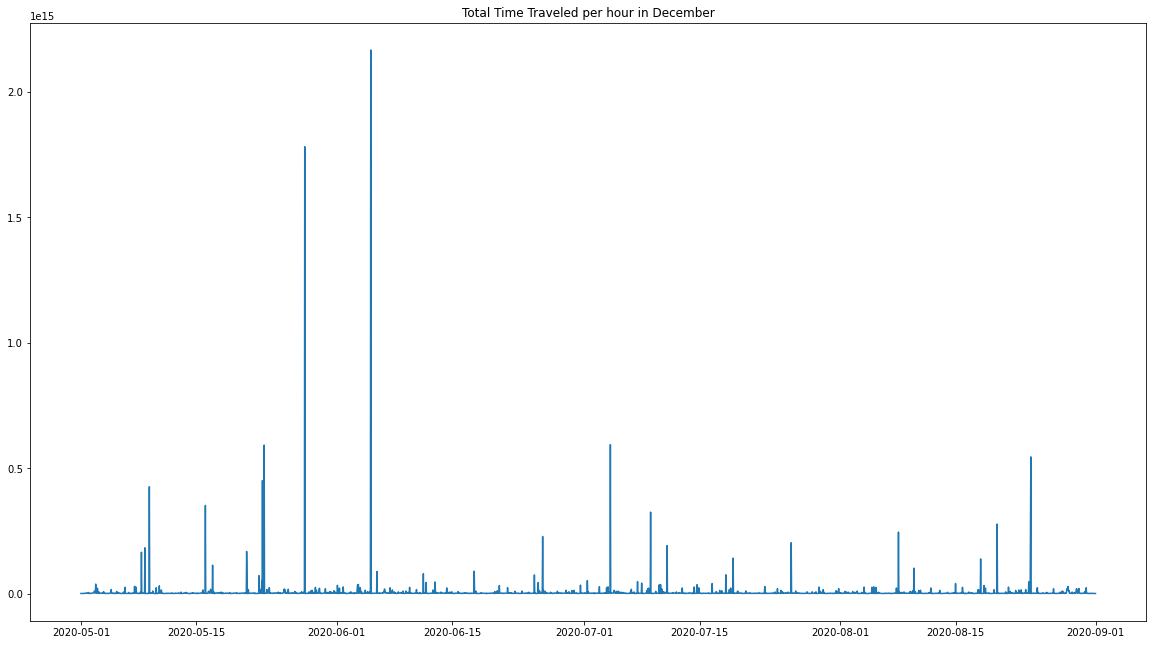

In [18]:
# Plot out the elapsed time per timem increment
hour_bike_df = bike_df.groupby(["started_at"])["elapsed_time"].mean()
plt.figure(figsize=(20, 11))
plt.plot(hour_bike_df.index, hour_bike_df.values, linestyle="solid")
plt.title("Total Time Traveled per hour in December")
plt.show()

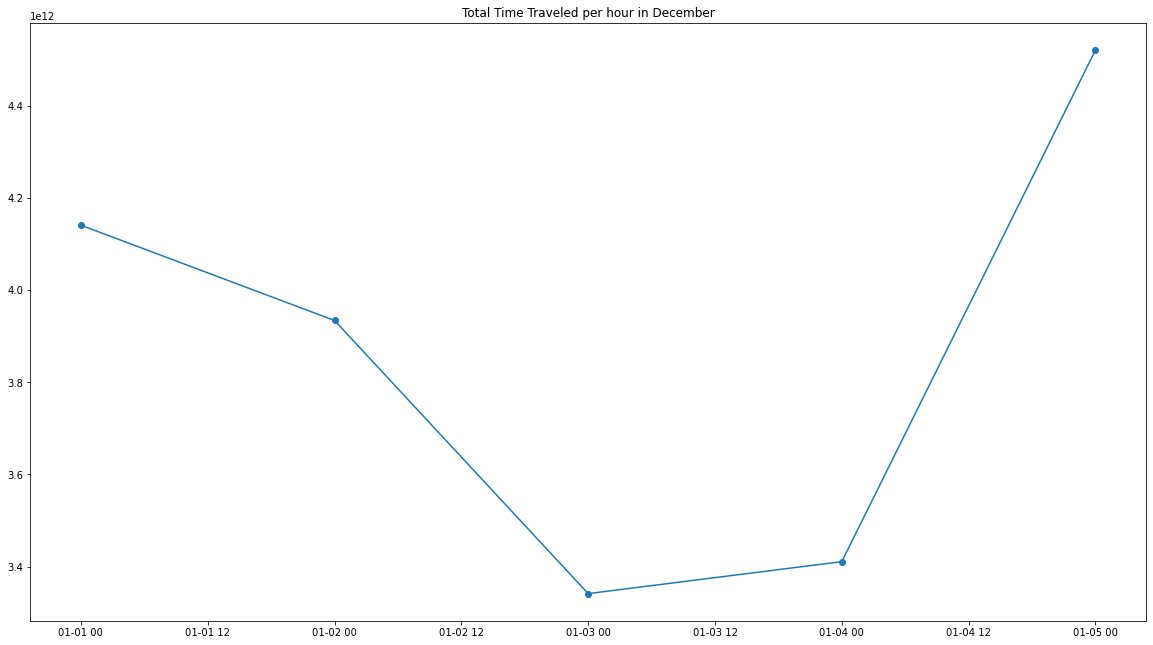

In [19]:
# Plot out the elapsed time per timem increment
hour_bike_df = bike_df.groupby(["started_at_week"])["elapsed_time"].mean()
plt.figure(figsize=(20, 11))
plt.plot_date(hour_bike_df.index, hour_bike_df.values, linestyle="solid")
plt.title("Total Time Traveled per hour in December")
plt.show()

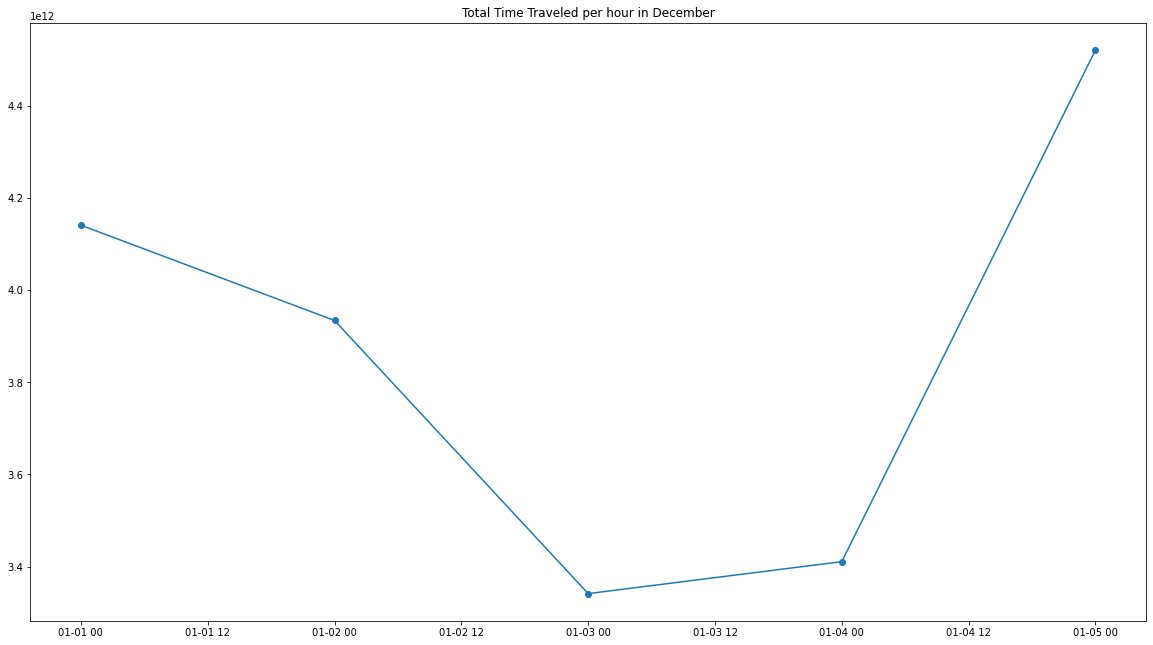

In [20]:
# Plot out the elapsed time per timem increment
hour_bike_df = bike_df.groupby(["started_at_week"])["elapsed_time"].mean()
plt.figure(figsize=(20, 11))
plt.plot_date(hour_bike_df.index, hour_bike_df.values, linestyle="solid")
plt.title("Total Time Traveled per hour in December")
plt.show()

In [21]:
# Bin off the latitude and longitude
location_list = ["start_lat", "start_lng", "end_lat", "end_lng"]
for perm in itertools.product([2, 5, 10],location_list):
        bike_df[f"{perm[1]}_{perm[0]}"] = bike_df[perm[1]].apply(lambda l: l - (l%perm[0]))
bike_df.drop(location_list, axis=1, inplace=True)
bike_df.head()

,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,member_casual,elapsed_time,started_at_year,started_at_month,...,end_lat_2,end_lng_2,start_lat_5,start_lng_5,end_lat_5,end_lng_5,start_lat_10,start_lng_10,end_lat_10,end_lng_10
0,docked_bike,2020-05-30 17:00:00,2020-05-31 18:00:00,Anacostia Library,31804.0,11th & H St NE,casual,1 days 00:59:53,2020,5,...,38.0,-78.0,35.0,-80.0,35.0,-80.0,30.0,-80.0,30.0,-80.0
1,docked_bike,2020-05-09 14:00:00,2020-05-09 15:00:00,10th & E St NW,31256.0,21st St & Constitution Ave NW,member,0 days 00:24:29,2020,5,...,38.0,-78.0,35.0,-80.0,35.0,-80.0,30.0,-80.0,30.0,-80.0
2,docked_bike,2020-05-24 17:00:00,2020-05-24 17:00:00,Connecticut Ave & Newark St NW / Cleveland Park,31305.0,12th & U St NW,member,0 days 00:16:32,2020,5,...,38.0,-78.0,35.0,-80.0,35.0,-80.0,30.0,-80.0,30.0,-80.0
3,docked_bike,2020-05-27 15:00:00,2020-05-27 15:00:00,Connecticut Ave & Newark St NW / Cleveland Park,31305.0,14th & Belmont St NW,casual,0 days 00:17:21,2020,5,...,38.0,-78.0,35.0,-80.0,35.0,-80.0,30.0,-80.0,30.0,-80.0
4,docked_bike,2020-05-31 14:00:00,2020-05-31 14:00:00,Georgia Ave & Morton St NW,31419.0,17th & K St NW,casual,0 days 00:24:27,2020,5,...,38.0,-78.0,35.0,-80.0,35.0,-80.0,30.0,-80.0,30.0,-80.0


In [22]:
# Convert the objects to categorical types
#bike_df[category_list] = bike_df[category_list].astype("category")
#bike_df.info()

In [23]:
# Get the one hot encoded dummy parameters
#bike_df = pd.get_dummies(data=bike_df, columns=category_list, drop_first=True)
#bike_df.head()

In [24]:
# break out the elapsed time
bike_df["elapsed_time"] = bike_df["elapsed_time"].apply(lambda l: l.seconds/60)
bike_df.head()

,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,member_casual,elapsed_time,started_at_year,started_at_month,...,end_lat_2,end_lng_2,start_lat_5,start_lng_5,end_lat_5,end_lng_5,start_lat_10,start_lng_10,end_lat_10,end_lng_10
0,docked_bike,2020-05-30 17:00:00,2020-05-31 18:00:00,Anacostia Library,31804.0,11th & H St NE,casual,59.883333,2020,5,...,38.0,-78.0,35.0,-80.0,35.0,-80.0,30.0,-80.0,30.0,-80.0
1,docked_bike,2020-05-09 14:00:00,2020-05-09 15:00:00,10th & E St NW,31256.0,21st St & Constitution Ave NW,member,24.483333,2020,5,...,38.0,-78.0,35.0,-80.0,35.0,-80.0,30.0,-80.0,30.0,-80.0
2,docked_bike,2020-05-24 17:00:00,2020-05-24 17:00:00,Connecticut Ave & Newark St NW / Cleveland Park,31305.0,12th & U St NW,member,16.533333,2020,5,...,38.0,-78.0,35.0,-80.0,35.0,-80.0,30.0,-80.0,30.0,-80.0
3,docked_bike,2020-05-27 15:00:00,2020-05-27 15:00:00,Connecticut Ave & Newark St NW / Cleveland Park,31305.0,14th & Belmont St NW,casual,17.350000,2020,5,...,38.0,-78.0,35.0,-80.0,35.0,-80.0,30.0,-80.0,30.0,-80.0
4,docked_bike,2020-05-31 14:00:00,2020-05-31 14:00:00,Georgia Ave & Morton St NW,31419.0,17th & K St NW,casual,24.450000,2020,5,...,38.0,-78.0,35.0,-80.0,35.0,-80.0,30.0,-80.0,30.0,-80.0


In [25]:
# Group the data to get the labels
cat_list = ["start_station_name", "started_at_year", "started_at_month", "started_at_day", "started_at_dow", "started_at_hour"]
num_list = ["start_station_name"]

In [26]:
# Aggregate the data to get ready for predicting by the hour
hour_df = bike_df.groupby([f"started_at_{val}" for val in ["year", "month", "week", "day", "hour"]]).count().reset_index().fillna(0)
#hour_df = hour_df.reset_index().drop(["index"], axis=1)
hour_df.columns

Index(['started_at_year', 'started_at_month', 'started_at_week',
       'started_at_day', 'started_at_hour', 'rideable_type', 'started_at',
       'ended_at', 'start_station_name', 'start_station_id',
       'end_station_name', 'member_casual', 'elapsed_time', 'started_at_dow',
       'ended_at_year', 'ended_at_month', 'ended_at_day', 'ended_at_hour',
       'ended_at_dow', 'ended_at_week', 'start_lat_2', 'start_lng_2',
       'end_lat_2', 'end_lng_2', 'start_lat_5', 'start_lng_5', 'end_lat_5',
       'end_lng_5', 'start_lat_10', 'start_lng_10', 'end_lat_10',
       'end_lng_10'],
      dtype='object')

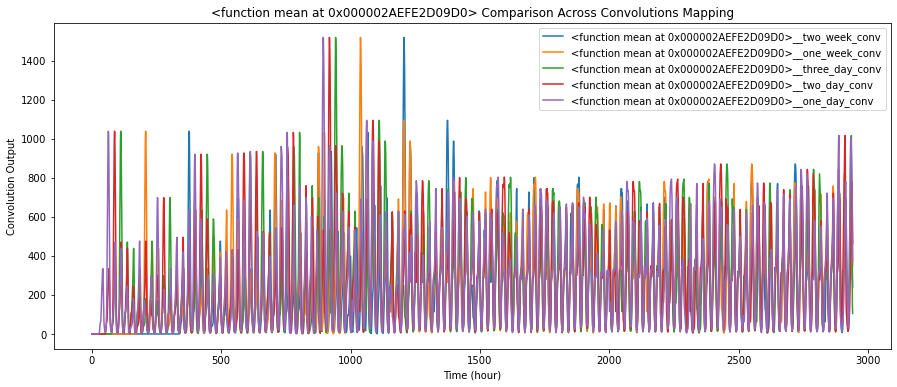

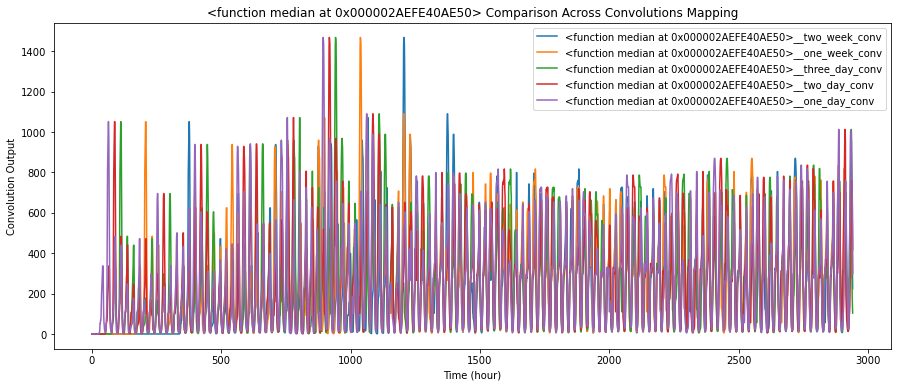

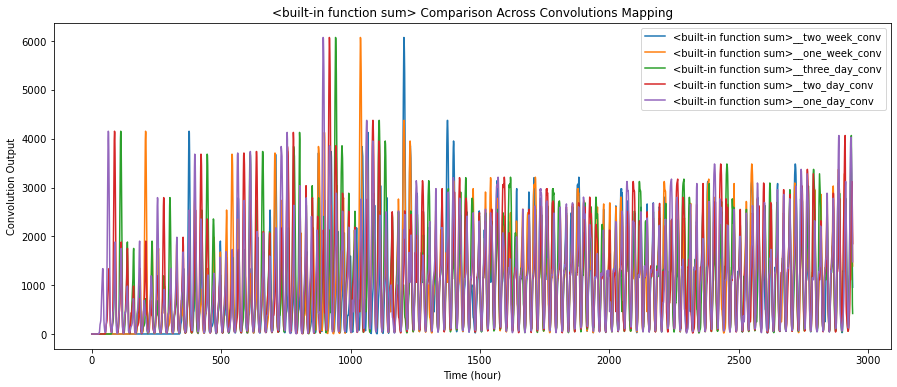

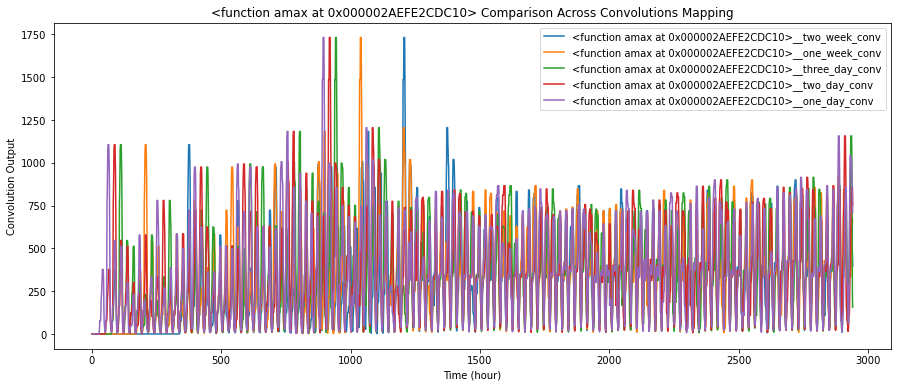

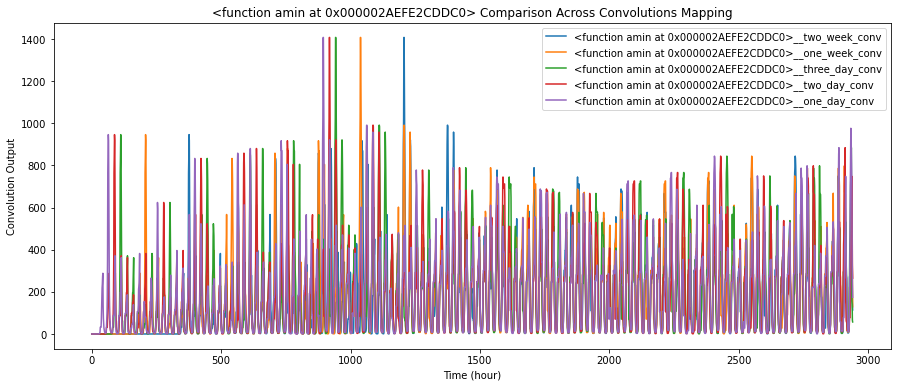

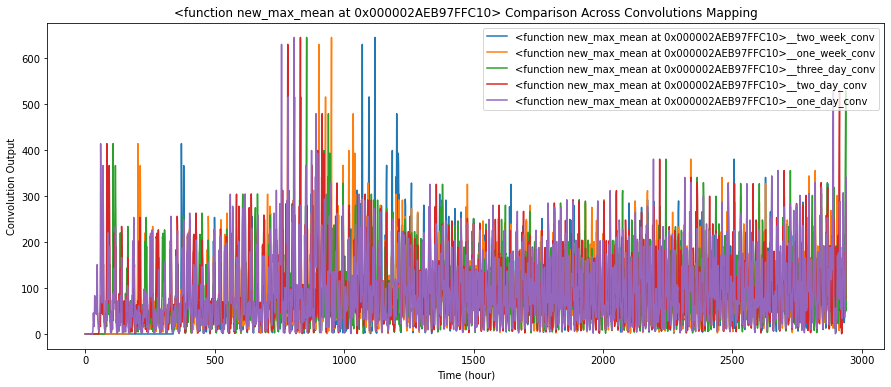

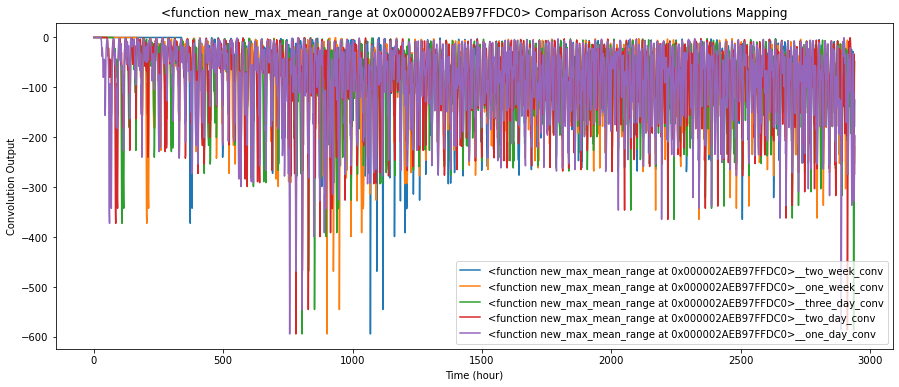

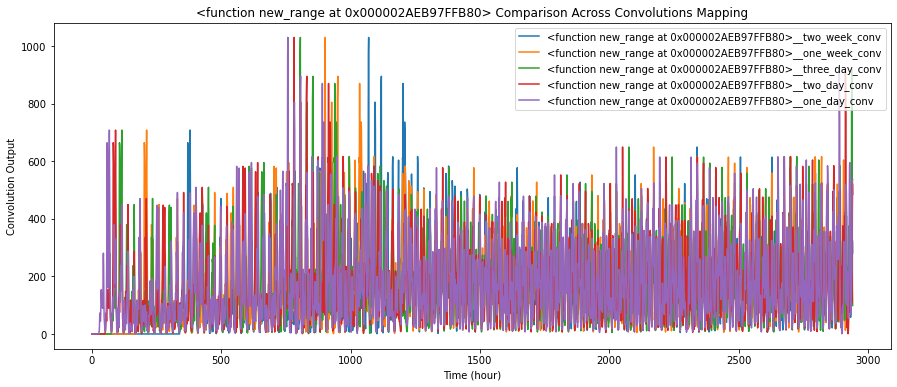

In [27]:
# Create a convolution for the elapsed time stuff
# Plot out the data by datetime
from scipy.stats import kurtosis

def create_convolution_list(input_data, conv_mapping, conv_mapping_function):
    min_conv = min(conv_mapping)
    max_conv = max(conv_mapping)
    output_list = [0 for x in range(-min_conv)]
    for item_index in range(-min_conv, len(input_data)-max(0, max_conv)):
        output_list.append(conv_mapping_function([input_data[item_index+x] for x in conv_mapping]))
    [output_list.append(x) for x in range(len(input_data)-max(0, max_conv), len(input_data))]
    return output_list

# Run a combination of graphs
def run_convolutions(input_data, new_col_names, mapping_lists, function_list):
    for function in function_list:
        plt.figure(figsize=(15,6))
        for x in range(len(mapping_lists)):
            col_name = f"{str(function)}__{new_col_names[x]}"
            hour_df[col_name] = create_convolution_list(input_data, mapping_lists[x], function)
            plt.plot(hour_df[col_name], label=col_name)
        plt.title(f"{str(function)} Comparison Across Convolutions Mapping")
        plt.xlabel("Time (hour)")
        plt.ylabel("Convolution Output")
        plt.legend()
        plt.show()
        
def upper_75_mean(input_val):
    return np.mean(sorted(input_val)[int(3*len(input_val)/4):])
    
def lower_75_mean(input_val):
    output_val = 0
    return np.mean(sorted(input_val)[:int(len(input_val)/4)])
        
def intermediate_func(input_val):
    return np.mean(input_val)*0.67

def bit_shift_mean(input_val):
    return np.mean([val & ~0xf for val in input_val])

def new_range(input_val):
    return np.max(input_val) - np.min(input_val)

def new_max_mean(input_val):
    return np.max(input_val) - np.mean(input_val)

def new_mean_range(input_val):
    return np.mean(input_val)/new_range(input_val)

def new_sum_range(input_val):
    return sum(input_val)/new_range(input_val)

def new_max_mean_range(input_val):
    return new_max_mean(input_val)-new_range(input_val)

# Run the convolutions on the data to add them to the dataset
day_offset = 24
week_offset = day_offset*7
weekly_list = list()
week_hour_offset = 4
four_week_conv = [-val for val in list(range(week_hour_offset+4*week_offset,4*week_offset, -1))]
three_week_conv = [-val for val in list(range(week_hour_offset+3*week_offset,3*week_offset, -1))]
two_week_conv = [-val for val in list(range(week_hour_offset+2*week_offset,2*week_offset, -1))]
one_week_conv = [-val for val in list(range(week_hour_offset+week_offset, 0+week_offset, -1))]
three_day_conv = [-val for val in list(range(week_hour_offset+day_offset*3, 0+day_offset*3, -1))]
two_day_conv = [-val for val in list(range(week_hour_offset+day_offset*2, 0+day_offset*2, -1))]
one_day_conv = [-val for val in list(range(week_hour_offset+day_offset, 0+day_offset, -1))]
six_four_conv_mapping = [-6, -5, -4]
five_three_mapping = [-5, -4, -3]
four_two_conv_mapping = [-4, -3, -2]
three_conv_mapping = [-3, -2, -1]
two_conv_mapping = [-2, -1]
one_conv_mapping = [-1]
wide_back_conv_mapping = [-10, -9, -8, -7, -6, -5, -4, -3, -2, -1]
lookback_conv_mapping = [-20, -18, -16, -14, -12, -10, -8, -6, -4, -2]
#func_list = [sum, np.mean, np.median]
func_list = [np.mean, np.median, sum, np.max, np.min, new_max_mean, new_max_mean_range, new_range]
#func_list=[new_max_mean_range]
#run_convolutions(hour_df["started_at_dow"], ["back_conv", "wide_back_conv", "look_back_conv"], [back_conv_mapping, wide_back_conv_mapping, lookback_conv_mapping], func_list)
run_convolutions(hour_df["rideable_type"], ["two_week_conv", "one_week_conv", "three_day_conv", "two_day_conv", "one_day_conv"], [two_week_conv, one_week_conv, three_day_conv, two_day_conv, one_day_conv], func_list)
#run_convolutions(hour_df["rideable_type"], ["three_day_conv", "two_day_conv", "one_day_conv", "six_four_conv"], [three_day_conv, two_day_conv, one_day_conv, six_four_conv_mapping], func_list)

hour_df = hour_df[2*week_offset+3:]

In [28]:
if "started_at" in bike_df.columns or "ended_at" in bike_df.columns:
    bike_df.drop(["started_at", "ended_at"], axis=1, inplace=True)

In [29]:
# Add the season column
def schedule_of_day(day_of_week, hour):
    print()

In [30]:
# Add the time of day
def time_of_day():
    print()

In [31]:
# Printing

def winter(month):
    return 1 if month in [12, 1, 2, 3] else 0

def spring(month):
    return 1 if month in [4, 5] else 0

def fall(month):
    return 1 if month in [9, 10, 11] else 0

def summer(month):
    return 1 if month in [6, 7, 8] else 0

def morning_commute(day, hour):
    return 1 if day >= 1 and day <= 5 and hour >= 7 and hour <= 9 else 0

def evening_commute(day, hour):
    return 1 if day >= 1 and day <= 5 and hour >= 16 and hour <= 19 else 0

def weekday_work_hours(day, hour):
    return 1 if day >= 1 and day <= 5 and hour > 9 and hour < 16 else 0

def weekday_night_hours(day, hour):
    return 1 if day >= 0 and day <= 4 and (hour > 19 or hour < 7) else 0

def weekend_night_hours(day, hour):
    return 1 if day >=5 and day <= 6 and (hour > 17 or hour < 7) else 0

def weekend_leisure_hours(day, hour):
    return 1 if (day == 0 or day == 6) and hour >= 7 and hour <= 17 else 0

day_counter = 5
day_value = 29
def day_update(day):
    global day_counter, day_value
    if day != day_value:
        day_counter += 1
        day_value = day
    return day_counter % 7

hour_df = hour_df.reset_index().drop(["index"], axis=1)
hour_df["day_of_week"] = hour_df["started_at_day"].apply(lambda l: day_update(l))
# apply the seasons
for col, funcname in list(zip(["winter", "spring", "summer", "fall"], [winter, spring, summer, fall])):
    hour_df[col] = hour_df["started_at_month"].apply(lambda l: funcname(l))
    
tod_cols = ["morning_commute", "evening_commute", "weekday_work_hours", "weekday_night_hours", "weekend_night_hours", "weekend_leisure_hours"]
tod_dict = {name:funcname for name, funcname in list(zip(tod_cols,[morning_commute, evening_commute, weekday_work_hours, weekday_night_hours, weekend_night_hours, weekend_leisure_hours]))}   
tod_list_dict = {name:list() for name in tod_cols}
for row_index in range(hour_df.shape[0]):
    for col in tod_cols:
        tod_list_dict[col].append(tod_dict[col](int(hour_df.iloc[row_index]["day_of_week"]), int(hour_df.iloc[row_index]["started_at_hour"])))
for col in tod_cols:
    hour_df[col] = tod_list_dict[col]

offset = 3
offset_count = 3
slope_list = list()
for row_index in range(offset+offset_count, hour_df.shape[0]-offset_count):
    slope_list.append(np.mean([hour_df.iloc[row_index-offset-val]["rideable_type"]-hour_df.iloc[row_index-offset-val-1]["rideable_type"] for val in range(offset_count-1)]))
hour_df = hour_df[offset+offset_count:hour_df.shape[0] - offset_count].reset_index().drop(["index"], axis=1)
hour_df["slope"] = slope_list

offset = 1
offset_count = 1
acceleration = list()
for row_index in range(offset+offset_count, hour_df.shape[0]-offset_count):
    acceleration.append(np.mean([hour_df.iloc[row_index-offset-val]["slope"]-hour_df.iloc[row_index-offset-val-1]["slope"] for val in range(max(1, offset_count-1))]))
hour_df = hour_df[offset+offset_count:hour_df.shape[0] - offset_count].reset_index().drop(["index"], axis=1)
hour_df["acceleration"] = acceleration


hour_df[["day_of_week", "started_at_day", "slope", "acceleration"]].head(50)

,day_of_week,started_at_day,slope,acceleration
0,6,15,42.5,-10.0
1,6,15,57.0,37.0
2,6,15,58.5,14.5
3,6,15,55.0,1.5
4,6,15,56.5,-3.5
5,6,15,86.0,1.5
6,6,15,133.0,29.5
7,6,15,56.0,47.0
8,6,15,-76.5,-77.0
9,6,15,-134.0,-132.5


In [32]:
# Start training some models and building pipelines
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import SGDRegressor, LinearRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
print(hour_df.columns)

cat_list = ["started_at_month", "started_at_week", "started_at_day", "started_at_hour", "winter", "summer", "fall", "spring", "morning_commute", "evening_commute", "weekday_work_hours", "weekday_night_hours", "weekend_leisure_hours", "weekend_night_hours"]
param_num_list = [found_col for found_col in hour_df.columns if "conv" in found_col] + ["slope", "acceleration"]
num_list = ["rideable_type"]

input_df = hour_df[cat_list + param_num_list + num_list].copy()
input_df[cat_list] = input_df[cat_list].astype("category")
input_df[param_num_list] = input_df[param_num_list].astype("float64")
input_df[num_list] = input_df[num_list].astype("int32")

selected_column = "weekend_leisure_hours"
#input_df = input_df[input_df[selected_column] == 1]
X = input_df[input_df.columns[~input_df.columns.isin(num_list)]]
y = input_df["rideable_type"]
# parameter pipelines to feed the main model
full_transformer=ColumnTransformer(transformers=[
    ("category", make_pipeline(OneHotEncoder(handle_unknown='ignore', sparse=False)), cat_list),
    ("number", make_pipeline(StandardScaler()), param_num_list)
])
input_sgd = SGDRegressor()
# Join parameter pipelines and the model pipeline
full_processor = make_pipeline(full_transformer, input_sgd)
col_processor = make_pipeline(full_transformer)
# Train test split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2)

Index(['started_at_year', 'started_at_month', 'started_at_week',
       'started_at_day', 'started_at_hour', 'rideable_type', 'started_at',
       'ended_at', 'start_station_name', 'start_station_id',
       'end_station_name', 'member_casual', 'elapsed_time', 'started_at_dow',
       'ended_at_year', 'ended_at_month', 'ended_at_day', 'ended_at_hour',
       'ended_at_dow', 'ended_at_week', 'start_lat_2', 'start_lng_2',
       'end_lat_2', 'end_lng_2', 'start_lat_5', 'start_lng_5', 'end_lat_5',
       'end_lng_5', 'start_lat_10', 'start_lng_10', 'end_lat_10', 'end_lng_10',
       '<function mean at 0x000002AEFE2D09D0>__two_week_conv',
       '<function mean at 0x000002AEFE2D09D0>__one_week_conv',
       '<function mean at 0x000002AEFE2D09D0>__three_day_conv',
       '<function mean at 0x000002AEFE2D09D0>__two_day_conv',
       '<function mean at 0x000002AEFE2D09D0>__one_day_conv',
       '<function median at 0x000002AEFE40AE50>__two_week_conv',
       '<function median at 0x000002AEFE4

In [33]:
x_test.head()

,started_at_month,started_at_week,started_at_day,started_at_hour,winter,summer,fall,spring,morning_commute,evening_commute,...,<function new_max_mean_range at 0x000002AEB97FFDC0>__three_day_conv,<function new_max_mean_range at 0x000002AEB97FFDC0>__two_day_conv,<function new_max_mean_range at 0x000002AEB97FFDC0>__one_day_conv,<function new_range at 0x000002AEB97FFB80>__two_week_conv,<function new_range at 0x000002AEB97FFB80>__one_week_conv,<function new_range at 0x000002AEB97FFB80>__three_day_conv,<function new_range at 0x000002AEB97FFB80>__two_day_conv,<function new_range at 0x000002AEB97FFB80>__one_day_conv,slope,acceleration
2202,8,2,15,16,0,1,0,0,0,0,...,-31.25,-89.25,-8.25,85.0,78.0,66.0,154.0,21.0,15.5,-85.5
1196,7,0,4,18,0,1,0,0,0,0,...,-96.00,-98.75,-45.00,221.0,326.0,259.0,232.0,85.0,3.5,8.5
550,6,1,7,20,0,1,0,0,0,0,...,-152.25,-327.50,-343.25,303.0,523.0,255.0,604.0,737.0,20.0,-27.5
1001,6,3,26,15,0,1,0,0,0,0,...,-22.50,-25.75,-31.75,147.0,207.0,39.0,35.0,61.0,70.0,61.5
1391,7,1,12,21,0,1,0,0,0,0,...,-112.00,-141.25,-94.25,228.0,73.0,232.0,240.0,151.0,-34.5,-15.0


In [34]:
# utilize the pipelines to try to make predictions
full_processor = full_processor.fit(x_train, y_train)

In [35]:
# Try to predict
y_pred_val = pd.Series(full_processor.predict(x_val))
y_val = y_val.astype("float64").reset_index().drop(["index"], axis=1).iloc[:,0]
y_pred_val

0      -70.368501
1       36.363164
2       51.824046
3       25.381428
4      649.774469
          ...    
410    186.867055
411    -24.841244
412    534.124003
413    222.988113
414     -0.029583
Length: 415, dtype: float64

In [36]:
# calculate the error in the pipeline
error = y_pred_val.subtract(y_val, fill_value=0.0)
print(f"Mean Error:{np.mean(error)}")
rmse = np.sqrt(mean_squared_error(y_val, y_pred_val))
mae = mean_absolute_error(y_val, y_pred_val)
r2 = r2_score(y_val, y_pred_val)
print(f"RMSE: {rmse} \nMAE: {mae} \nR2: {r2}")

Mean Error:10.736816638929746
RMSE: 134.5863001720039 
MAE: 90.17340743176322 
R2: 0.7350618106920637


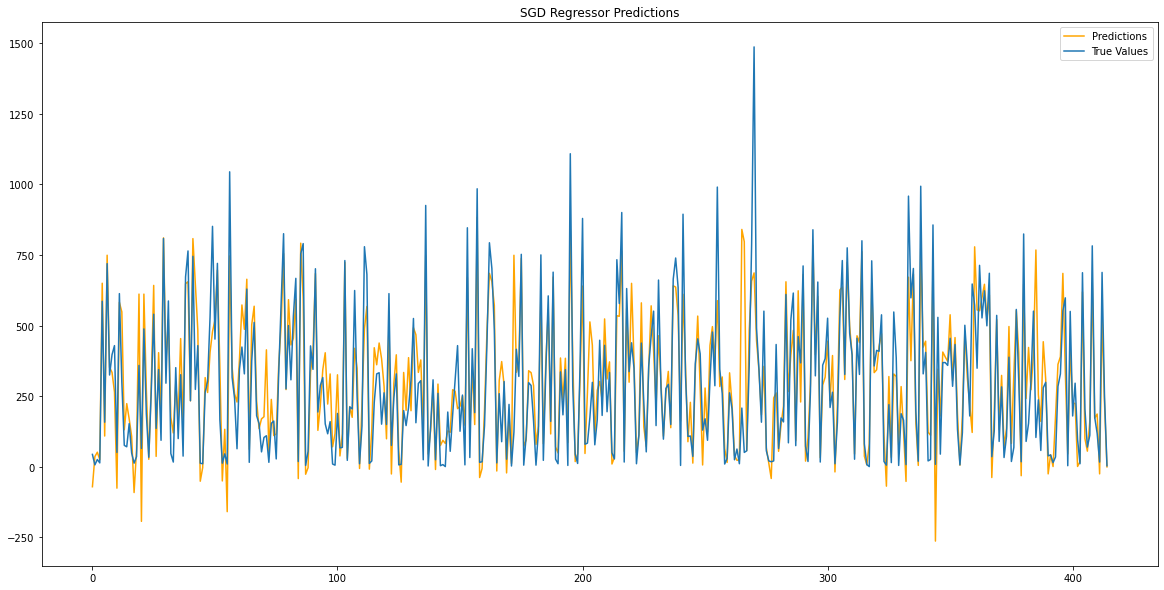

In [37]:
# Plot out the
plt.figure(figsize=(20,10))
plt.plot(range(len(y_pred_val)), y_pred_val, label="Predictions", color="orange")
plt.plot(range(len(y_val)), y_val, label="True Values")
plt.title("SGD Regressor Predictions")
plt.legend()
plt.show()

In [38]:
input_sgd.coef_

array([ 1.50419274e+01,  6.51463194e+00,  4.44435907e+00,  9.77001988e+00,
        1.95961031e+01,  8.91222015e+00, -5.64054431e+00,  2.34040415e+00,
        1.05627552e+01, -1.70081413e+01,  1.68164091e+01, -1.16087580e+01,
        1.55413974e+00, -2.54298718e+01,  5.52723252e+01,  1.61508481e+01,
        2.75424558e+01,  8.90635945e+00, -2.74899070e+01, -5.64910130e+00,
       -1.90635084e+00, -8.64208401e+00,  4.65999528e+01,  7.17460656e+00,
        1.91952985e+01, -4.72584329e+01,  2.62030489e+00, -1.53407149e+00,
       -3.24382026e+01, -1.13523222e+01, -4.97656849e+01,  2.75771454e+01,
       -7.96493733e+00,  2.93610162e+01,  1.01569294e+01,  4.32825760e+00,
        8.55550821e-01, -3.06974345e+01,  8.40970392e+01, -4.36924005e+01,
       -2.74903802e+01, -1.50286002e+01, -3.11676798e+01, -3.35033158e+01,
       -5.00457107e+01, -3.42830146e+01,  1.42109802e+01, -6.50319974e+01,
       -5.98020114e+01, -1.06583648e+02, -4.80634530e+01, -1.90874639e+01,
        6.52053199e+01,  

In [39]:
value_dict = dict(sorted(dict(list(zip(X.columns, input_sgd.coef_))).items(), key=lambda item: item[1])[::-1])
for item in value_dict.items():
    print(f"{item[0]}:{item[1]}")

<function amin at 0x000002AEFE2CDDC0>__one_day_conv:84.09703924369055
slope:73.66082152514956
<function new_range at 0x000002AEB97FFB80>__two_day_conv:65.2053198601245
acceleration:62.74328425424603
<function new_range at 0x000002AEB97FFB80>__one_day_conv:58.38246615946055
<function mean at 0x000002AEFE2D09D0>__two_week_conv:55.2723252466625
<function median at 0x000002AEFE40AE50>__two_day_conv:46.5999527838116
<function amax at 0x000002AEFE2CDC10>__one_day_conv:29.361016192451718
<function amax at 0x000002AEFE2CDC10>__three_day_conv:27.57714540608643
<function mean at 0x000002AEFE2D09D0>__three_day_conv:27.54245577912764
winter:19.59610310224326
<built-in function sum>__two_week_conv:19.195298495969606
weekday_work_hours:16.816409097280047
<function mean at 0x000002AEFE2D09D0>__one_week_conv:16.1508480572276
started_at_month:15.041927353735359
<function new_max_mean_range at 0x000002AEB97FFDC0>__three_day_conv:14.210980194787592
morning_commute:10.562755154711471
<function amin at 0x0

In [40]:
# Error
error

0     -114.368501
1       29.363164
2       25.824046
3       11.381428
4       63.774469
          ...    
410     68.867055
411    -41.841244
412   -153.875997
413    -24.011887
414     -4.029583
Length: 415, dtype: float64

In [41]:
# Try out the RandomizedSearch, GridSearchCV
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [42]:
# Use the RandomizedSearch on the SGDRegressor
clf = SGDRegressor(max_iter=1000, tol=1e-3)

# add the pipeline right here


In [43]:
import scipy.stats as ss
from sklearn.utils.fixes import loguniform
# Set up the parameter distributions for SearchCV's
param_dist = {
    "max_iter":ss.uniform(1000, 5000),
    "tol":loguniform(1e-5, 1e0),
    "learning_rate":["adaptive", "optimal"],
    "shuffle":[True]
}

In [44]:
# Set up the RandomizedSearchCV first
n_iter_search = 15
random_search = RandomizedSearchCV(
    clf, param_distributions=param_dist, n_iter=n_iter_search
)

In [45]:
# Run the randomized search
col_pipeline = make_pipeline(full_transformer, random_search)
col_pipeline.fit(x_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('category',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['started_at_month',
                                                   'started_at_week',
                                                   'started_at_day',
                                                   'started_at_hour', 'winter',
                                                   'summer', 'fall', 'spring',
                                                   'morning_commute',
                                                   'evening_commute',
                                                   'weekday_work_hours',
                             

In [46]:
# Quoted from sklearn's website
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results["rank_test_score"] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print(
                "Mean validation score: {0:.3f} (std: {1:.3f})".format(
                    results["mean_test_score"][candidate],
                    results["std_test_score"][candidate],
                )
            )
            print("Parameters: {0}".format(results["params"][candidate]))
            print("")
report(random_search.cv_results_)

Model with rank: 1
Mean validation score: 0.759 (std: 0.019)
Parameters: {'learning_rate': 'adaptive', 'max_iter': 1242.6727667251243, 'shuffle': True, 'tol': 0.003795157349405257}

Model with rank: 2
Mean validation score: 0.759 (std: 0.018)
Parameters: {'learning_rate': 'adaptive', 'max_iter': 4556.182212335474, 'shuffle': True, 'tol': 0.08445481298436243}

Model with rank: 3
Mean validation score: -3880226791524195328.000 (std: 2261409615781281536.000)
Parameters: {'learning_rate': 'optimal', 'max_iter': 1248.9481451669367, 'shuffle': True, 'tol': 0.0010007756481141827}



In [47]:
random_search.best_params_

{'learning_rate': 'adaptive',
 'max_iter': 1242.6727667251243,
 'shuffle': True,
 'tol': 0.003795157349405257}

In [48]:
# Now run the model results for the Random Search CV
random_best_pipeline = make_pipeline(full_transformer, SGDRegressor(learning_rate=random_search.best_params_["learning_rate"], max_iter=random_search.best_params_["max_iter"], shuffle=True, tol=random_search.best_params_["tol"]))
random_best_pipeline.fit(x_train, y_train)
y_random_preds = random_best_pipeline.predict(x_val)
np.sqrt(mean_squared_error(y_val, y_random_preds))

133.85707327416395

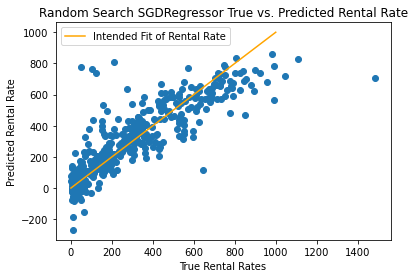

In [49]:
# Plot out the Random Search CV Predictions
# Plot out the predictions for further analysis
plt.scatter(y_val, y_random_preds)
plt.plot([0,1000], [0, 1000], label="Intended Fit of Rental Rate", color="orange")
plt.legend()
plt.xlabel("True Rental Rates")
plt.ylabel("Predicted Rental Rate")
plt.title("Random Search SGDRegressor True vs. Predicted Rental Rate")
plt.show()

In [50]:
# Now try to turn to grid search

# Redefine the param grid
param_grid = {
    "max_iter":np.linspace(100, 1000, num=5),
    "tol":np.power(10, np.arange(-5, 3, dtype=float)),
    "learning_rate":["adaptive", "invscaling"],
    "shuffle":[True],
    "eta0":[0.001, 0.01]
}

# Next then run the search iteration
grid_search = GridSearchCV(
    clf, param_grid=param_grid
)

grid_pipeline = make_pipeline(full_transformer, grid_search)

grid_pipeline.fit(x_train, y_train)

C:\Users\albre\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1225: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\albre\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1225: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\albre\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1225: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\albre\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1225: ConvergenceWarning: Maximum number of iteration reached before 

C:\Users\albre\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1225: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\albre\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1225: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\albre\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1225: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\albre\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1225: ConvergenceWarning: Maximum number of iteration reached before 

C:\Users\albre\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1225: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\albre\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1225: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\albre\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1225: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\albre\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1225: ConvergenceWarning: Maximum number of iteration reached before 

C:\Users\albre\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1225: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\albre\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1225: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\albre\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1225: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\albre\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1225: ConvergenceWarning: Maximum number of iteration reached before 

C:\Users\albre\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1225: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\albre\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1225: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\albre\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1225: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\albre\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1225: ConvergenceWarning: Maximum number of iteration reached before 

C:\Users\albre\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1225: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\albre\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1225: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\albre\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1225: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\albre\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1225: ConvergenceWarning: Maximum number of iteration reached before 

C:\Users\albre\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1225: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\albre\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1225: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\albre\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1225: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\albre\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1225: ConvergenceWarning: Maximum number of iteration reached before 

C:\Users\albre\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1225: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\albre\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1225: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\albre\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1225: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\albre\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1225: ConvergenceWarning: Maximum number of iteration reached before 

C:\Users\albre\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1225: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\albre\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1225: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\albre\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1225: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\albre\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1225: ConvergenceWarning: Maximum number of iteration reached before 

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('category',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['started_at_month',
                                                   'started_at_week',
                                                   'started_at_day',
                                                   'started_at_hour', 'winter',
                                                   'summer', 'fall', 'spring',
                                                   'morning_commute',
                                                   'evening_commute',
                                                   'weekday_work_hours',
                             

In [51]:
# Now print out the report statistics
report(grid_search.cv_results_, 10)

Model with rank: 1
Mean validation score: 0.761 (std: 0.016)
Parameters: {'eta0': 0.01, 'learning_rate': 'adaptive', 'max_iter': 100.0, 'shuffle': True, 'tol': 0.0001}

Model with rank: 2
Mean validation score: 0.761 (std: 0.015)
Parameters: {'eta0': 0.01, 'learning_rate': 'adaptive', 'max_iter': 1000.0, 'shuffle': True, 'tol': 0.1}

Model with rank: 3
Mean validation score: 0.761 (std: 0.016)
Parameters: {'eta0': 0.01, 'learning_rate': 'adaptive', 'max_iter': 325.0, 'shuffle': True, 'tol': 0.01}

Model with rank: 4
Mean validation score: 0.761 (std: 0.017)
Parameters: {'eta0': 0.01, 'learning_rate': 'adaptive', 'max_iter': 1000.0, 'shuffle': True, 'tol': 1e-05}

Model with rank: 5
Mean validation score: 0.761 (std: 0.015)
Parameters: {'eta0': 0.01, 'learning_rate': 'adaptive', 'max_iter': 325.0, 'shuffle': True, 'tol': 0.1}

Model with rank: 6
Mean validation score: 0.761 (std: 0.016)
Parameters: {'eta0': 0.01, 'learning_rate': 'adaptive', 'max_iter': 775.0, 'shuffle': True, 'tol': 10

In [52]:
grid_search.best_params_

{'eta0': 0.01,
 'learning_rate': 'adaptive',
 'max_iter': 100.0,
 'shuffle': True,
 'tol': 0.0001}

In [53]:
# Validate the RMSE of the GridSearchCV
clf = SGDRegressor(eta0=grid_search.best_params_['eta0'],warm_start=True, learning_rate=grid_search.best_params_['learning_rate'], max_iter=grid_search.best_params_['max_iter'], shuffle=True, tol=grid_search.best_params_['tol'])
new_grid_pipeline = make_pipeline(full_transformer, clf)
new_grid_pipeline.fit(x_train, y_train)
y_grid_preds = new_grid_pipeline.predict(x_val)
np.sqrt(mean_squared_error(y_val, y_grid_preds))

C:\Users\albre\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1225: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


133.45601870919168

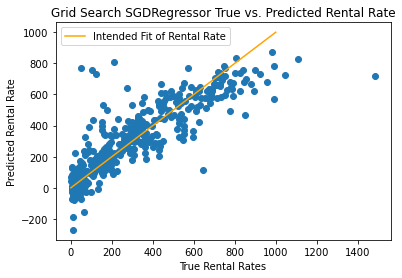

In [54]:
# Plot out the predictions for further analysis
plt.scatter(y_val, y_grid_preds)
plt.plot([0,1000], [0, 1000], label="Intended Fit of Rental Rate", color="orange")
plt.legend()
plt.xlabel("True Rental Rates")
plt.ylabel("Predicted Rental Rate")
plt.title("Grid Search SGDRegressor True vs. Predicted Rental Rate")
plt.show()

In [55]:
# Now test out the DecisionTreeRegressor for this interaction
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()

# establish the parameters to use for the distribution
dt_param_dist = {
    "splitter":["best"],
    "max_depth":ss.uniform(2, 20),
    "min_samples_split":[2, 4, 6, 8, 10, 20],
    "min_samples_leaf":[3, 4, 5, 6, 8]
}

# Set up the RandomizedSearchCV first
n_iter_search = 30
random_search = RandomizedSearchCV(
    dt, param_distributions=dt_param_dist, n_iter=n_iter_search
)

#construct the pipeline
dt_pipeline = make_pipeline(full_transformer, random_search)

# Run the test
dt_pipeline.fit(x_train, y_train)
y_dt_preds = dt_pipeline.predict(x_val)

In [56]:
np.sqrt(mean_squared_error(y_val, y_dt_preds))

144.897729963475

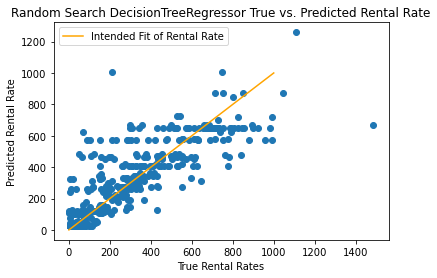

In [57]:
# Plot out the predictions for further analysis
plt.scatter(y_val, y_dt_preds)
plt.plot([0,1000], [0, 1000], label="Intended Fit of Rental Rate", color="orange")
plt.legend()
plt.xlabel("True Rental Rates")
plt.ylabel("Predicted Rental Rate")
plt.title("Random Search DecisionTreeRegressor True vs. Predicted Rental Rate")
plt.show()

In [58]:
# Now test out the RandomForest Regressor
from sklearn.ensemble import RandomForestRegressor

rf_param_dist = {
    "n_estimators":np.linspace(50, 200, 5).astype(int),
    "max_depth":np.linspace(5, 20, 10).astype(int),
    "min_samples_split":np.linspace(2, 8, 10).astype(int),
    "max_features":["auto", "log2", "sqrt"],
    "bootstrap":[True],
    "oob_score":[False, True]
}

rf = RandomForestRegressor()

# Draft up the RandomizedSearchCV
n_iter_search = 30
random_search = RandomizedSearchCV(
    rf, param_distributions=rf_param_dist, n_iter=n_iter_search
)

# Make the pipeline and run it.
rf_pipeline = make_pipeline(full_transformer, random_search)
rf_pipeline.fit(x_train, y_train)
y_rf_preds = rf_pipeline.predict(x_val)
np.sqrt(mean_squared_error(y_val, y_rf_preds))

123.28771233274168

In [59]:
np.sqrt(mean_squared_error(y_val, y_rf_preds))

123.28771233274168

In [60]:
random_search.best_params_

{'oob_score': False,
 'n_estimators': 162,
 'min_samples_split': 3,
 'max_features': 'auto',
 'max_depth': 20,
 'bootstrap': True}

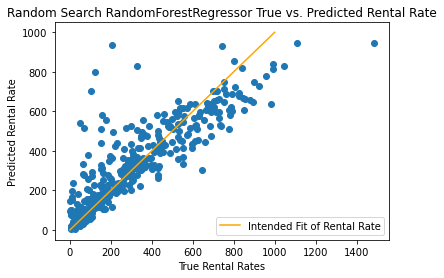

In [61]:
# Plot out the predictions for further analysis
plt.scatter(y_val, y_rf_preds)
plt.plot([0,1000], [0, 1000], label="Intended Fit of Rental Rate", color="orange")
plt.legend()
plt.xlabel("True Rental Rates")
plt.ylabel("Predicted Rental Rate")
plt.title("Random Search RandomForestRegressor True vs. Predicted Rental Rate")
plt.show()

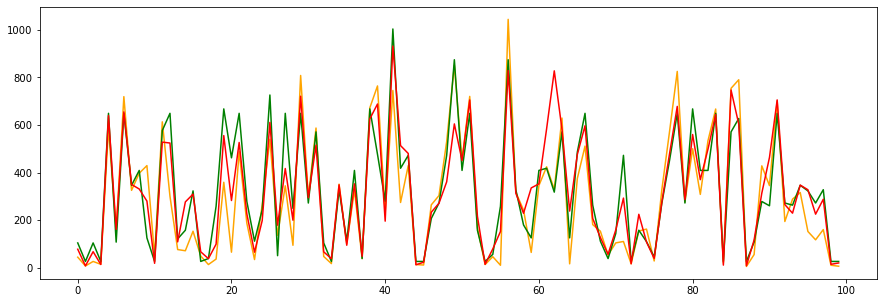

In [62]:
# Plot out the results against others
index = 100
plt.figure(figsize=(15,5))
plt.plot(y_val[:index], color="orange")
plt.plot(y_dt_preds[:index], color="green")
plt.plot(y_rf_preds[:index], "red")

In [63]:
# Test out a Polynomial Regression implementation through the PolynomialFeatures class and the LinearRegression method.
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# construct the base model
lr = LinearRegression()

# construct the parameters for the LinearRegression
lr_param_dist = {
    "fit_intercept":[True, False],
    "normalize":[True, False]
}

# Run the polynomial features, and transform them prior to running the search.
poly = PolynomialFeatures(4)
x_poly_train = poly.fit_transform(x_train)
poly.get_feature_names(X.columns)
x_poly_val = poly.transform(x_val)

# RandomizedSearchCV for the Polynomial Regression
n_iter_search = 30
random_search_poly = RandomizedSearchCV(
    lr, param_distributions=lr_param_dist, n_iter=n_iter_search
)

poly_x_train_df = pd.DataFrame(x_train, columns=X.columns)
poly_x_val_df = pd.DataFrame(x_val, columns=X.columns)

# Run the pipeline on the transformed features
poly_pipeline = make_pipeline(full_transformer, random_search_poly)
poly_pipeline.fit(poly_x_train_df, y_train)
y_poly_preds = poly_pipeline.predict(poly_x_val_df)
np.sqrt(mean_squared_error(y_val, y_poly_preds))

C:\Users\albre\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=30. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


132.832209761816

In [64]:
np.sqrt(mean_squared_error(y_val, y_poly_preds))

132.832209761816

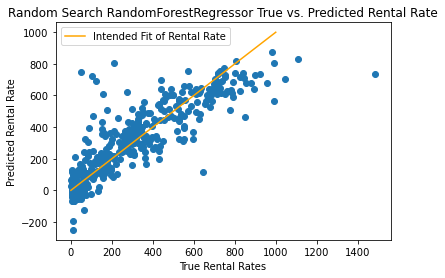

In [65]:
# Plot out the predictions for further analysis
plt.scatter(y_val, y_poly_preds)
plt.plot([0,1000], [0, 1000], label="Intended Fit of Rental Rate", color="orange")
plt.legend()
plt.xlabel("True Rental Rates")
plt.ylabel("Predicted Rental Rate")
plt.title("Random Search RandomForestRegressor True vs. Predicted Rental Rate")
plt.show()

In [66]:
# Test out a Polynomial Regression implementation through the PolynomialFeatures class and the LinearRegression method.
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# construct the base model
lr = LinearRegression()

# construct the parameters for the LinearRegression
lr_param_dist = {
    "fit_intercept":[True, False],
    "normalize":[True, False]
}

# Run the polynomial features, and transform them prior to running the search.
poly = PolynomialFeatures(3)
x_poly_train = poly.fit_transform(x_train)
poly.get_feature_names(X.columns)
x_poly_val = poly.transform(x_val)

# RandomizedSearchCV for the Polynomial Regression
n_iter_search = 30
random_search_poly = RandomizedSearchCV(
    lr, param_distributions=lr_param_dist, n_iter=n_iter_search
)

poly_x_train_df = pd.DataFrame(x_train, columns=X.columns)
poly_x_val_df = pd.DataFrame(x_val, columns=X.columns)

# Run the pipeline on the transformed features
poly_pipeline = make_pipeline(full_transformer, random_search_poly)
poly_pipeline.fit(poly_x_train_df, y_train)
y_poly_preds = poly_pipeline.predict(poly_x_val_df)

C:\Users\albre\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=30. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


In [67]:
np.sqrt(mean_squared_error(y_val, y_poly_preds))

132.832209761816

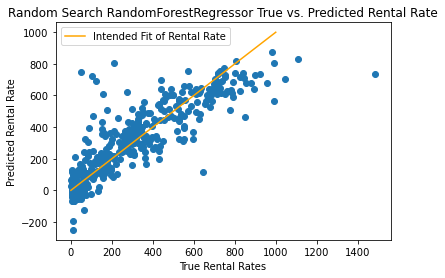

In [68]:
# Plot out the predictions for further analysis
plt.scatter(y_val, y_poly_preds)
plt.plot([0,1000], [0, 1000], label="Intended Fit of Rental Rate", color="orange")
plt.legend()
plt.xlabel("True Rental Rates")
plt.ylabel("Predicted Rental Rate")
plt.title("Random Search RandomForestRegressor True vs. Predicted Rental Rate")
plt.show()

In [71]:
import scipy.stats as ss
from sklearn.utils.fixes import loguniform
from sklearn.ensemble import GradientBoostingRegressor
# Set up the parameter distributions for SearchCV's
param_dist = {
    "max_depth":ss.uniform(2, 20),
    "min_samples_split":[2, 6, 10, 20],
    "min_samples_leaf":[3, 6]
}

gbtree = GradientBoostingRegressor()
# Set up the RandomizedSearchCV first
n_iter_search = 1
random_search = RandomizedSearchCV(
    gbtree, param_distributions=param_dist, n_iter=n_iter_search
)

rs_clf_pipeline = make_pipeline(full_transformer, random_search)
rs_clf_pipeline.fit(x_train, y_train)
y_clf_preds = rs_clf_pipeline.predict(x_test)
np.sqrt(mean_squared_error(y_test, y_clf_preds))

96.11048869012532

In [72]:
# Start in the merge of Soren's code
dataset_dir = "../DataSet_CSVs/ComplementaryDatasets/"
weather_df = pd.read_csv(dataset_dir + "dc_weather_data.csv")
weather_df.head()

#This data looks nasty so we'll have to do some cleaning up. Lots of NaN's

w_df = weather_df
b_df = bike_df

w_df.drop(columns='STATION', inplace=True)
w_df.drop(columns='NAME', inplace=True)
w_df.drop(columns='ELEVATION', inplace=True)
#w_df.drop(columns='LATITUDE', inplace=True)
#w_df.drop(columns='LONGITUDE', inplace=True)
w_df.fillna(0, inplace=True)

w_df["DATE"] = pd.DatetimeIndex(w_df["DATE"])
#w_df["MONTH"] = 
w_df["YEAR"] = pd.DatetimeIndex(w_df["DATE"]).year
w_df["MONTH"] = pd.DatetimeIndex(w_df["DATE"]).month
w_df["DAY"] = pd.DatetimeIndex(w_df["DATE"]).day

w_df.drop(columns='DATE', inplace=True)

In [73]:
w_df.head()

,LATITUDE,LONGITUDE,AWND,DAPR,MDPR,PRCP,SNOW,SNWD,TAVG,TMAX,...,WT04,WT05,WT06,WT08,WT09,WT11,WT18,YEAR,MONTH,DAY
0,39.039861,-77.004083,0.0,0.0,0.0,1.30,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020,5,1
1,39.039861,-77.004083,0.0,0.0,0.0,0.06,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020,5,2
2,39.039861,-77.004083,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020,5,3
3,39.039861,-77.004083,0.0,0.0,0.0,0.54,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020,5,4
4,39.039861,-77.004083,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020,5,5


In [74]:
w_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76652 entries, 0 to 76651
Data columns (total 30 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   LATITUDE   76652 non-null  float64
 1   LONGITUDE  76652 non-null  float64
 2   AWND       76652 non-null  float64
 3   DAPR       76652 non-null  float64
 4   MDPR       76652 non-null  float64
 5   PRCP       76652 non-null  float64
 6   SNOW       76652 non-null  float64
 7   SNWD       76652 non-null  float64
 8   TAVG       76652 non-null  float64
 9   TMAX       76652 non-null  float64
 10  TMIN       76652 non-null  float64
 11  TOBS       76652 non-null  float64
 12  WDF2       76652 non-null  float64
 13  WDF5       76652 non-null  float64
 14  WDMV       76652 non-null  float64
 15  WSF2       76652 non-null  float64
 16  WSF5       76652 non-null  float64
 17  WT01       76652 non-null  float64
 18  WT02       76652 non-null  float64
 19  WT03       76652 non-null  float64
 20  WT04  

In [75]:
w_df.describe()

,LATITUDE,LONGITUDE,AWND,DAPR,MDPR,PRCP,SNOW,SNWD,TAVG,TMAX,...,WT04,WT05,WT06,WT08,WT09,WT11,WT18,YEAR,MONTH,DAY
count,76652.000000,76652.000000,76652.000000,76652.000000,76652.000000,76652.000000,76652.000000,76652.000000,76652.000000,76652.000000,...,76652.000000,76652.000000,76652.000000,76652.000000,76652.000000,76652.000000,76652.000000,76652.000000,76652.000000,76652.000000
mean,38.969701,-77.022224,0.228547,0.048114,0.008506,0.153414,0.028665,0.046912,1.504279,6.934431,...,0.001018,0.000078,0.001161,0.003653,0.000013,0.001018,0.000013,2020.648581,7.036372,15.679265
std,0.204119,0.253103,1.361973,1.365623,0.135925,0.398710,0.320608,0.424914,9.746372,21.406679,...,0.031884,0.008847,0.034055,0.060329,0.003612,0.031884,0.003612,0.559010,3.358698,8.831549
min,38.467400,-77.497598,0.000000,-312.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2020.000000,1.000000,1.000000
25%,38.832400,-77.206180,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2020.000000,5.000000,8.000000
50%,38.978422,-77.038549,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2021.000000,7.000000,16.000000
75%,39.117498,-76.848587,0.000000,0.000000,0.000000,0.080000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2021.000000,10.000000,23.000000
max,39.339729,-76.483900,22.820000,59.000000,10.850000,8.360000,12.000000,12.000000,90.000000,100.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2022.000000,12.000000,31.000000


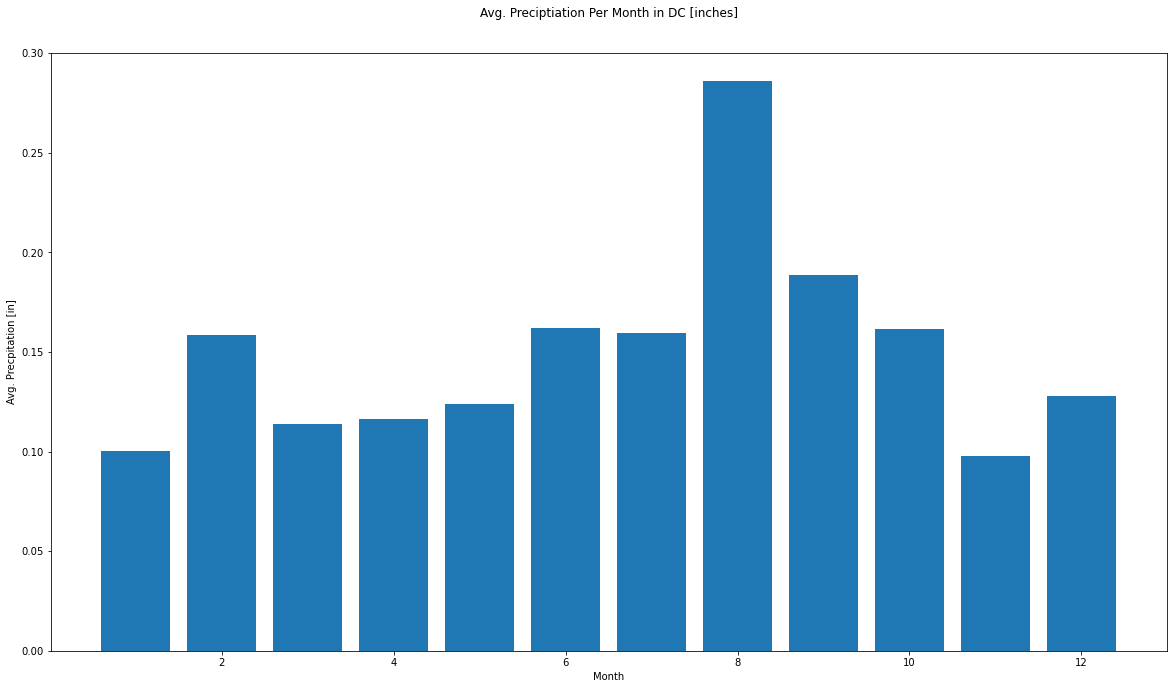

In [76]:
time_w_df = w_df[w_df['PRCP'] > 0]
time_w_df = w_df.groupby(["MONTH"]).mean()

plt.figure(figsize=(20, 11))

plt.bar(time_w_df.index, time_w_df['PRCP'])
plt.xlabel('Month')
plt.ylabel('Avg. Precpitation [in]')
plt.title('Avg. Preciptiation Per Month in DC [inches]', y=1.05)
plt.show()

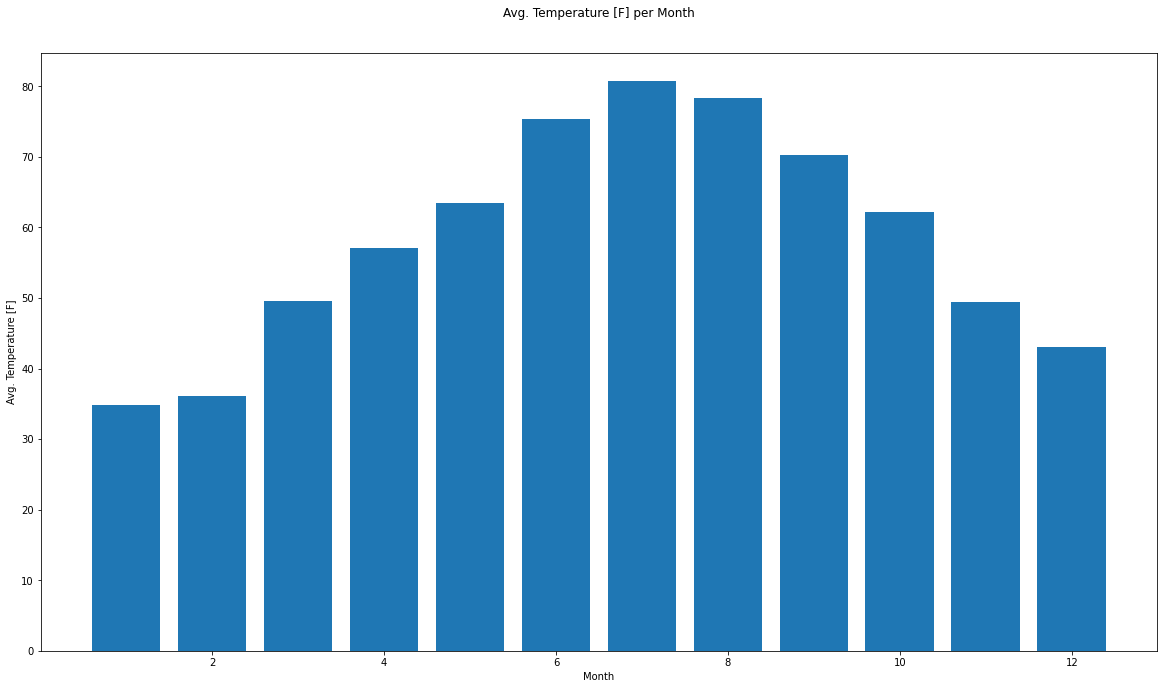

In [77]:
time_w_df = w_df[w_df['TAVG'] > 0.1]
time_w_df = time_w_df.groupby(["MONTH"]).mean()
plt.figure(figsize=(20, 11))

plt.bar(time_w_df.index, time_w_df['TAVG'])
plt.xlabel('Month')
plt.ylabel('Avg. Temperature [F]')
plt.title('Avg. Temperature [F] per Month', y=1.05)
plt.show()

In [78]:
#Rainfall as a predictor

#I will start by going to the begginning and creating a new dataframe where I remove all entries where there is a NaN for rainfall

dataset_dir = "../DataSet_CSVs"
weather_df = pd.read_csv(dataset_dir + "/ComplementaryDatasets/dc_weather_data.csv")
#rain_df.head()

#This data looks nasty so we'll have to do some cleaning up. Lots of NaN's

b_df = bike_df
w_df = weather_df
w_df["DATE"] = pd.DatetimeIndex(w_df["DATE"])
w_df = w_df.sort_values('DATE')


w_df["YEAR"] = pd.DatetimeIndex(w_df["DATE"]).year
w_df["MONTH"] = pd.DatetimeIndex(w_df["DATE"]).month
w_df["DAY"] = pd.DatetimeIndex(w_df["DATE"]).day


w_df = w_df[['DATE','YEAR','MONTH','DAY','PRCP','AWND','SNOW','SNWD','TAVG']]
w_df = w_df[w_df['PRCP'].notna()]
w_df = w_df[w_df['TAVG'].notna()]
w_df = w_df[w_df['AWND'].notna()]
w_df = w_df[w_df['SNOW'].notna()]
w_df = w_df[w_df['SNWD'].notna()]
w_df.head()

,DATE,YEAR,MONTH,DAY,PRCP,AWND,SNOW,SNWD,TAVG
60104,2020-05-01,2020,5,1,0.18,10.96,0.0,0.0,57.0
37357,2020-05-01,2020,5,1,0.10,8.05,0.0,0.0,58.0
38591,2020-05-01,2020,5,1,0.09,10.74,0.0,0.0,59.0
38592,2020-05-02,2020,5,2,0.00,8.72,0.0,0.0,61.0
37358,2020-05-02,2020,5,2,0.00,6.49,0.0,0.0,61.0


In [79]:
w_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1923 entries, 60104 to 60744
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   DATE    1923 non-null   datetime64[ns]
 1   YEAR    1923 non-null   int64         
 2   MONTH   1923 non-null   int64         
 3   DAY     1923 non-null   int64         
 4   PRCP    1923 non-null   float64       
 5   AWND    1923 non-null   float64       
 6   SNOW    1923 non-null   float64       
 7   SNWD    1923 non-null   float64       
 8   TAVG    1923 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(3)
memory usage: 150.2 KB


In [80]:
w_df.describe()

,YEAR,MONTH,DAY,PRCP,AWND,SNOW,SNWD,TAVG
count,1923.000000,1923.000000,1923.000000,1923.000000,1923.000000,1923.000000,1923.000000,1923.000000
mean,2020.666147,7.012480,15.770671,0.131300,7.064852,0.033957,0.063391,59.961518
std,0.565053,3.393059,8.823741,0.359518,3.275398,0.332190,0.427381,16.773312
min,2020.000000,1.000000,1.000000,0.000000,0.890000,0.000000,0.000000,19.000000
25%,2020.000000,5.000000,8.000000,0.000000,4.700000,0.000000,0.000000,45.000000
50%,2021.000000,7.000000,16.000000,0.000000,6.490000,0.000000,0.000000,61.000000
75%,2021.000000,10.000000,23.000000,0.050000,8.720000,0.000000,0.000000,75.000000
max,2022.000000,12.000000,31.000000,4.130000,22.820000,6.900000,7.000000,90.000000


In [81]:
w_df['DATE'].nunique()

641

In [82]:
#So there are 75000 entries and only 641 unique dates so we will average the precipitation per day

#dates = w_df.columns.difference(['DATE'])

w_df = w_df.resample('d', on='DATE').mean().dropna(how='all')
w_df.describe()

,YEAR,MONTH,DAY,PRCP,AWND,SNOW,SNWD,TAVG
count,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000
mean,2020.666147,7.012480,15.770671,0.131300,7.064852,0.033957,0.063391,59.961518
std,0.565347,3.394826,8.828336,0.320539,3.017471,0.316304,0.387918,16.736445
min,2020.000000,1.000000,1.000000,0.000000,1.416667,0.000000,0.000000,20.333333
25%,2020.000000,5.000000,8.000000,0.000000,4.923333,0.000000,0.000000,45.000000
50%,2021.000000,7.000000,16.000000,0.000000,6.413333,0.000000,0.000000,61.333333
75%,2021.000000,10.000000,23.000000,0.076667,8.573333,0.000000,0.000000,75.333333
max,2022.000000,12.000000,31.000000,2.466667,21.696667,5.866667,5.033333,88.333333


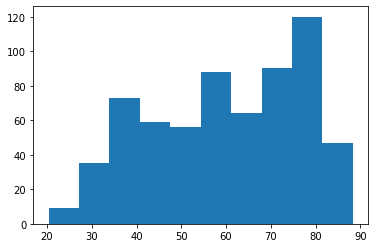

In [83]:
plt.hist(w_df['TAVG'])
plt.show()

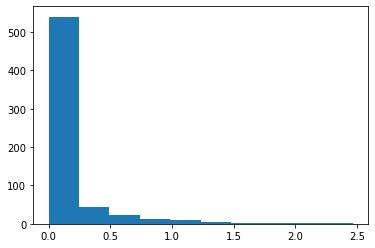

In [84]:
plt.hist(w_df['PRCP'])
plt.show()

In [85]:
#this actually looks very reasonable and aligns with the googled value
print(w_df.loc[w_df['YEAR'] == 2020,['PRCP']].sum(axis=0))

PRCP    40.266667
dtype: float64


In [86]:
#so does this. I feel better about using this now. Just looked odd to me. 
print(w_df.loc[w_df['YEAR'] == 2021,['PRCP']].sum(axis=0))

PRCP    39.946667
dtype: float64


In [87]:
#what I'll try right now is resampling bike data the same way I did the weather
#data and then plot some metric of rides vs. some metric of prcp
copied_bike_df = copy_bike_df.copy()
copied_bike_df['started_on'] = pd.to_datetime(copied_bike_df['started_at']).dt.normalize()
bike_df = copied_bike_df.sort_values('started_on')

a = copied_bike_df.groupby("started_on").size().values
b_df = copied_bike_df.drop_duplicates(subset="started_on").assign(Count=a)

b_df = b_df[['started_on', 'Count']]
b_df = b_df.sort_values('started_on')

b_df.head()

,started_on,Count
18,2020-05-01,5818
6,2020-05-02,1385
26,2020-05-03,3730
34,2020-05-04,6339
20,2020-05-05,5659


In [88]:
w_df = w_df.sort_values('PRCP', ascending=False)
w_df.head()

,YEAR,MONTH,DAY,PRCP,AWND,SNOW,SNWD,TAVG
DATE,,,,,,,,
2021-09-01,2021.0,9.0,1.0,2.466667,10.366667,0.0,0.0,77.000000
2020-08-04,2020.0,8.0,4.0,2.223333,9.173333,0.0,0.0,75.333333
2020-11-30,2020.0,11.0,30.0,2.170000,7.753333,0.0,0.0,55.000000
2020-10-29,2020.0,10.0,29.0,2.050000,9.396667,0.0,0.0,59.666667
2021-10-25,2021.0,10.0,25.0,1.976667,8.950000,0.0,0.0,67.333333


In [89]:
wb_df = pd.merge(b_df, w_df, left_on='started_on', right_on='DATE')

wb_df = wb_df[['started_on','YEAR','MONTH','DAY','PRCP','TAVG','AWND','Count']]
wb_df = wb_df.rename(columns={'started_on':"DATE", "Count":"COUNT"})

In [90]:
wb_df.describe()

,YEAR,MONTH,DAY,PRCP,TAVG,AWND,COUNT
count,123.0,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000
mean,2020.0,6.504065,15.878049,0.174228,74.344173,6.978970,6854.048780
std,0.0,1.126244,8.913597,0.344888,9.157391,2.566390,2487.773581
min,2020.0,5.000000,1.000000,0.000000,43.666667,3.060000,1385.000000
25%,2020.0,5.500000,8.000000,0.000000,71.000000,5.180000,5398.500000
50%,2020.0,7.000000,16.000000,0.000000,77.000000,6.186667,6720.000000
75%,2020.0,7.500000,23.500000,0.183333,80.500000,7.978333,8482.500000
max,2020.0,8.000000,31.000000,2.223333,88.333333,16.106667,15482.000000


In [91]:
wb_df.head()

,DATE,YEAR,MONTH,DAY,PRCP,TAVG,AWND,COUNT
0,2020-05-01,2020.0,5.0,1.0,0.123333,58.000000,9.916667,5818
1,2020-05-02,2020.0,5.0,2.0,0.000000,60.333333,7.530000,1385
2,2020-05-03,2020.0,5.0,3.0,0.660000,65.333333,7.080000,3730
3,2020-05-04,2020.0,5.0,4.0,0.046667,67.666667,13.943333,6339
4,2020-05-05,2020.0,5.0,5.0,0.163333,55.000000,5.293333,5659


In [92]:
#we now have the amount of rides and the amount of precipitation in a day so
#we can now determine the correlation between the two of these

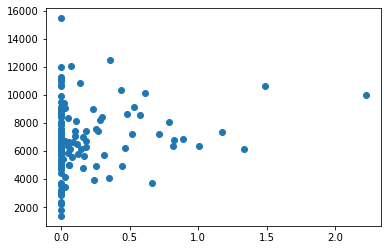

In [93]:
plt.scatter(data=wb_df,x='PRCP',y='COUNT')

In [94]:
#surprisingly uncorrelated. We know that there will be plenty of days where
#there are other fluctuations in ride even if there isnt rain so lets try to
#stratify or group things differently

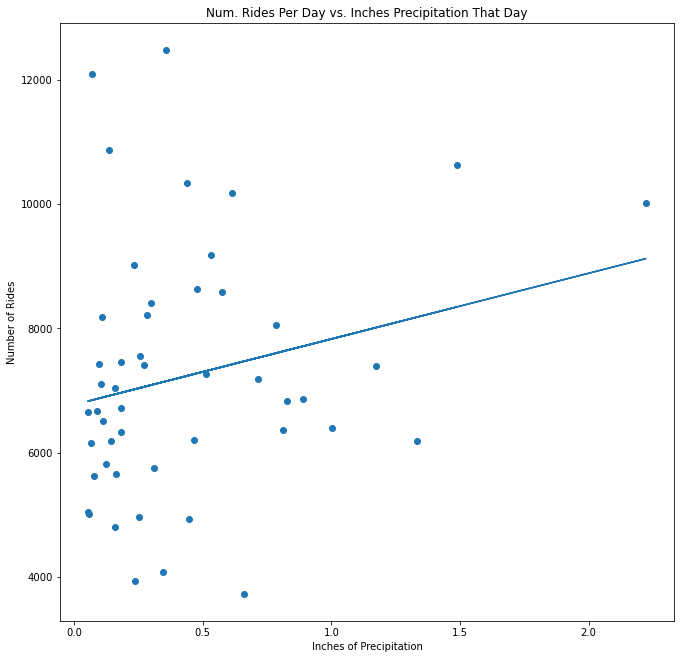

In [95]:
#filter out some data
temp_df = wb_df
temp_df = temp_df[temp_df['PRCP']>0.05]
wb_df = temp_df

#create fit line
m, b = np.polyfit(temp_df.PRCP.values, temp_df.COUNT.values, 1)

plt.figure(figsize=(11, 11))
plt.scatter(data=temp_df,x='PRCP',y='COUNT')

plt.title('Num. Rides Per Day vs. Inches Precipitation That Day')
plt.xlabel('Inches of Precipitation')
plt.ylabel('Number of Rides')
plt.plot(temp_df.PRCP.values, m*temp_df.PRCP.values + b)

plt.show()

In [96]:
from scipy.stats import pearsonr

#calculate R and P values
pearsonr(temp_df.PRCP.values, temp_df.COUNT.values)

(0.229520439930024, 0.1126423882230674)

In [97]:
# Bin off the latitude and longitude
location_list = ["start_lat", "start_lng", "end_lat", "end_lng"]
for perm in itertools.product([2, 5, 10],location_list):
        bike_df[f"{perm[1]}_{perm[0]}"] = bike_df[perm[1]].apply(lambda l: l - (l%perm[0]))
bike_df.drop(location_list, axis=1, inplace=True)
bike_df.head()

,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,member_casual,started_on,start_lat_2,start_lng_2,end_lat_2,end_lng_2,start_lat_5,start_lng_5,end_lat_5,end_lng_5,start_lat_10,start_lng_10,end_lat_10,end_lng_10
116144,docked_bike,2020-05-01 15:40:01,2020-05-01 15:52:03,Calvert St & Woodley Pl NW,31121.0,14th & V St NW,member,2020-05-01,38.0,-78.0,38.0,-78.0,35.0,-80.0,35.0,-80.0,30.0,-80.0,30.0,-80.0
8561,docked_bike,2020-05-01 04:38:41,2020-05-01 04:45:40,4th & W St NE,31500.0,3rd & M St NE,member,2020-05-01,38.0,-78.0,38.0,-78.0,35.0,-80.0,35.0,-80.0,30.0,-80.0,30.0,-80.0
90640,docked_bike,2020-05-01 19:48:03,2020-05-01 19:53:10,39th & Calvert St NW / Stoddert,31306.0,34th St & Wisconsin Ave NW,member,2020-05-01,38.0,-78.0,38.0,-78.0,35.0,-80.0,35.0,-80.0,30.0,-80.0,30.0,-80.0
23130,docked_bike,2020-05-01 17:54:04,2020-05-01 17:54:51,15th St & N Scott St,31031.0,15th St & N Scott St,member,2020-05-01,38.0,-78.0,38.0,-78.0,35.0,-80.0,35.0,-80.0,30.0,-80.0,30.0,-80.0
49496,docked_bike,2020-05-01 15:54:06,2020-05-01 15:59:05,18th St & Wyoming Ave NW,31114.0,17th & Corcoran St NW,member,2020-05-01,38.0,-78.0,38.0,-78.0,35.0,-80.0,35.0,-80.0,30.0,-80.0,30.0,-80.0


In [98]:
# Start training some models and building pipelines
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
print(hour_df.columns)

cat_list = ["started_at_month", "started_at_week", "started_at_day", "started_at_hour","day_of_week", "winter", "summer", "fall", "spring", "morning_commute", "evening_commute", "weekday_work_hours", "weekday_night_hours", "weekend_leisure_hours", "weekend_night_hours"]


#merge in weather data
hour_df = pd.merge(hour_df, wb_df, left_on=['started_at_year', 'started_at_month', 'started_at_day'], right_on=['YEAR', 'MONTH', 'DAY'])
hour_df.drop(['DATE','COUNT','YEAR','MONTH','DAY'], axis=1, inplace=True)
for col in ['PRCP_x', 'PRCP_y', 'TAVG_x', 'TAVG_y', 'AWND_x', 'AWND_y']:
    if col in list(hour_df.columns):
        hour_df.drop([col], axis=1, inplace=True)

hour_df.info()

Index(['started_at_year', 'started_at_month', 'started_at_week',
       'started_at_day', 'started_at_hour', 'rideable_type', 'started_at',
       'ended_at', 'start_station_name', 'start_station_id',
       'end_station_name', 'member_casual', 'elapsed_time', 'started_at_dow',
       'ended_at_year', 'ended_at_month', 'ended_at_day', 'ended_at_hour',
       'ended_at_dow', 'ended_at_week', 'start_lat_2', 'start_lng_2',
       'end_lat_2', 'end_lng_2', 'start_lat_5', 'start_lng_5', 'end_lat_5',
       'end_lng_5', 'start_lat_10', 'start_lng_10', 'end_lat_10', 'end_lng_10',
       '<function mean at 0x000002AEFE2D09D0>__two_week_conv',
       '<function mean at 0x000002AEFE2D09D0>__one_week_conv',
       '<function mean at 0x000002AEFE2D09D0>__three_day_conv',
       '<function mean at 0x000002AEFE2D09D0>__two_day_conv',
       '<function mean at 0x000002AEFE2D09D0>__one_day_conv',
       '<function median at 0x000002AEFE40AE50>__two_week_conv',
       '<function median at 0x000002AEFE4

In [99]:
param_num_list = [found_col for found_col in hour_df.columns if "conv" in found_col] + ["PRCP", "TAVG", "AWND"]
num_list = ["rideable_type"]

input_df = hour_df[cat_list + param_num_list + num_list].copy()
input_df[cat_list] = input_df[cat_list].astype("category")
input_df[param_num_list] = input_df[param_num_list].astype("float64")
input_df[num_list] = input_df[num_list].astype("int32")

X = input_df[input_df.columns[~input_df.columns.isin(num_list)]]
print(X.columns)
y = input_df["rideable_type"]
print(X.columns)
# parameter pipelines to feed the main model
full_transformer=ColumnTransformer(transformers=[
    ("category", make_pipeline(OneHotEncoder(handle_unknown='ignore', sparse=False)), cat_list),
    ("number", make_pipeline(StandardScaler()), param_num_list)
])

# Join parameter pipelines and the model pipeline
full_processor = make_pipeline(full_transformer, SGDRegressor(max_iter=1000, tol=1e-3))
col_processor = make_pipeline(full_transformer)
# Train test split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2)

Index(['started_at_month', 'started_at_week', 'started_at_day',
       'started_at_hour', 'day_of_week', 'winter', 'summer', 'fall', 'spring',
       'morning_commute', 'evening_commute', 'weekday_work_hours',
       'weekday_night_hours', 'weekend_leisure_hours', 'weekend_night_hours',
       '<function mean at 0x000002AEFE2D09D0>__two_week_conv',
       '<function mean at 0x000002AEFE2D09D0>__one_week_conv',
       '<function mean at 0x000002AEFE2D09D0>__three_day_conv',
       '<function mean at 0x000002AEFE2D09D0>__two_day_conv',
       '<function mean at 0x000002AEFE2D09D0>__one_day_conv',
       '<function median at 0x000002AEFE40AE50>__two_week_conv',
       '<function median at 0x000002AEFE40AE50>__one_week_conv',
       '<function median at 0x000002AEFE40AE50>__three_day_conv',
       '<function median at 0x000002AEFE40AE50>__two_day_conv',
       '<function median at 0x000002AEFE40AE50>__one_day_conv',
       '<built-in function sum>__two_week_conv',
       '<built-in functio

In [100]:
# utilize the pipelines to try to make predictions
full_processor.fit(x_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('category',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['started_at_month',
                                                   'started_at_week',
                                                   'started_at_day',
                                                   'started_at_hour',
                                                   'day_of_week', 'winter',
                                                   'summer', 'fall', 'spring',
                                                   'morning_commute',
                                                   'evening_commute',
                                    

In [101]:
# Try to predict
y_pred_val = pd.Series(full_processor.predict(x_val))
y_val = y_val.astype("float64").reset_index().drop(["index"], axis=1).iloc[:,0]
y_val

0      438.0
1      194.0
2       57.0
3      685.0
4      493.0
       ...  
163    271.0
164    403.0
165      6.0
166    352.0
167     13.0
Name: rideable_type, Length: 168, dtype: float64

In [102]:
# calculate the error in the pipeline
error = y_pred_val.subtract(y_val, fill_value=0.0)
rmse = np.sqrt(mean_squared_error(y_val, y_pred_val))
mae = mean_absolute_error(y_val, y_pred_val)
r2 = r2_score(y_val, y_pred_val)
print(f"RMSE: {rmse} \nMAE: {mae} \nR2: {r2}")

RMSE: 141.62976439241896 
MAE: 97.88405788340836 
R2: 0.676135298595445


In [103]:
# Error
error

0        4.621103
1        2.004102
2      -96.079094
3     -114.006798
4       72.595551
          ...    
163     90.208770
164   -114.847221
165     97.971337
166    -98.306903
167    -92.076462
Length: 168, dtype: float64

In [104]:
clf = SGDRegressor(max_iter=1000, tol=1e-3)


In [105]:
import scipy.stats as ss
from sklearn.utils.fixes import loguniform
# Set up the parameter distributions for SearchCV's
param_dist = {
    "max_iter":ss.uniform(1000, 5000),
    "tol":loguniform(1e-5, 1e0),
    "learning_rate":["adaptive", "optimal"],
    "shuffle":[True]
}

In [106]:
# Set up the RandomizedSearchCV first
n_iter_search = 30
random_search = RandomizedSearchCV(
    clf, param_distributions=param_dist, n_iter=n_iter_search
)

In [107]:
rs_clf_pipeline = make_pipeline(full_transformer, random_search)
rs_clf_pipeline.fit(x_train, y_train)
y_clf_preds = rs_clf_pipeline.predict(x_test)
np.sqrt(mean_squared_error(y_test, y_clf_preds))

122.40933945657596

In [108]:
# Now test out the DecisionTreeRegressor for this interaction
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

dt = DecisionTreeRegressor()

# establish the parameters to use for the distribution
dt_param_dist = {
    "splitter":["best"],
    "max_depth":ss.uniform(2, 20),
    "min_samples_split":[2, 4, 6, 8, 10, 20],
    "min_samples_leaf":[3, 4, 5, 6, 8]
}

# Set up the RandomizedSearchCV first
n_iter_search = 30
random_search = RandomizedSearchCV(
    dt, param_distributions=dt_param_dist, n_iter=n_iter_search
)

#construct the pipeline
dt_pipeline = make_pipeline(full_transformer, random_search)

# Run the test
random_search.fit(x_train, y_train)
y_dt_preds = random_search.predict(x_test)

In [109]:
random_search.best_estimator_

DecisionTreeRegressor(max_depth=6.871299494841928, min_samples_leaf=8,
                      min_samples_split=6)

[Text(153.45000000000002, 201.90857142857143, 'X[3] <= 6.5\nmse = 47068.414\nsamples = 671\nvalue = 255.365'),
 Text(70.621875, 170.84571428571428, 'X[3] <= 5.5\nmse = 1830.894\nsamples = 196\nvalue = 37.597'),
 Text(50.56875, 139.78285714285715, 'X[36] <= 123.5\nmse = 1179.18\nsamples = 169\nvalue = 28.059'),
 Text(31.387500000000003, 108.72, 'X[3] <= 0.5\nmse = 267.955\nsamples = 149\nvalue = 21.497'),
 Text(13.950000000000001, 77.65714285714284, 'X[29] <= 935.0\nmse = 198.249\nsamples = 19\nvalue = 41.474'),
 Text(6.9750000000000005, 46.59428571428572, 'mse = 196.331\nsamples = 11\nvalue = 34.182'),
 Text(20.925, 46.59428571428572, 'mse = 27.25\nsamples = 8\nvalue = 51.5'),
 Text(48.825, 77.65714285714284, 'X[3] <= 4.5\nmse = 211.29\nsamples = 130\nvalue = 18.577'),
 Text(34.875, 46.59428571428572, 'X[21] <= 94.25\nmse = 80.751\nsamples = 103\nvalue = 14.126'),
 Text(27.900000000000002, 15.531428571428563, 'mse = 25.843\nsamples = 77\nvalue = 11.026'),
 Text(41.85, 15.53142857142856

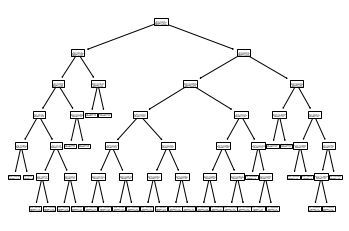

In [110]:
from sklearn.tree import plot_tree
plot_tree(random_search.best_estimator_)

In [111]:
np.sqrt(mean_squared_error(y_test, y_dt_preds))

121.42633840546996

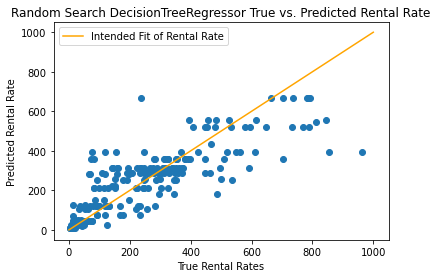

In [112]:
# Plot out the predictions for further analysis
plt.scatter(y_test, y_dt_preds)
plt.plot([0,1000], [0, 1000], label="Intended Fit of Rental Rate", color="orange")
plt.legend()
plt.xlabel("True Rental Rates")
plt.ylabel("Predicted Rental Rate")
plt.title("Random Search DecisionTreeRegressor True vs. Predicted Rental Rate")
plt.show()

In [113]:
# Now test out the RandomForest Regressor
from sklearn.ensemble import RandomForestRegressor

rf_param_dist = {
    "n_estimators":np.linspace(50, 200, 5).astype(int),
    "max_depth":np.linspace(5, 20, 10).astype(int),
    "min_samples_split":np.linspace(2, 8, 10).astype(int),
    "max_features":["auto", "log2", "sqrt"],
    "bootstrap":[True],
    "oob_score":[False, True]
}

rf = RandomForestRegressor()

# Draft up the RandomizedSearchCV
n_iter_search = 30
random_search = RandomizedSearchCV(
    rf, param_distributions=rf_param_dist, n_iter=n_iter_search
)

# Make the pipeline and run it.
rf_pipeline = make_pipeline(full_transformer, random_search)
rf_pipeline.fit(x_train, y_train)
y_rf_preds = rf_pipeline.predict(x_val)
np.sqrt(mean_squared_error(y_val, y_rf_preds))

126.79941735268953

In [114]:
# Test out a Polynomial Regression implementation through the PolynomialFeatures class and the LinearRegression method.
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# construct the base model
lr = LinearRegression()

# construct the parameters for the LinearRegression
lr_param_dist = {
    "fit_intercept":[True, False],
    "normalize":[True, False]
}

# Run the polynomial features, and transform them prior to running the search.
poly = PolynomialFeatures(4)
x_poly_train = poly.fit_transform(x_train)
poly.get_feature_names(X.columns)
x_poly_val = poly.transform(x_val)

# RandomizedSearchCV for the Polynomial Regression
n_iter_search = 30
random_search_poly = RandomizedSearchCV(
    lr, param_distributions=lr_param_dist, n_iter=n_iter_search
)

poly_x_train_df = pd.DataFrame(x_train, columns=X.columns)
poly_x_val_df = pd.DataFrame(x_val, columns=X.columns)

# Run the pipeline on the transformed features
poly_pipeline = make_pipeline(full_transformer, random_search_poly)
poly_pipeline.fit(poly_x_train_df, y_train)
y_poly_preds = poly_pipeline.predict(poly_x_val_df)
np.sqrt(mean_squared_error(y_val, y_poly_preds))

C:\Users\albre\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=30. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


129.66291212054955

In [116]:
import scipy.stats as ss
from sklearn.utils.fixes import loguniform
from sklearn.ensemble import GradientBoostingRegressor
# Set up the parameter distributions for SearchCV's
param_dist = {
    "max_depth":ss.uniform(2, 20),
    "min_samples_split":[2, 6, 10, 20],
    "min_samples_leaf":[3, 6]
}

gbtree = GradientBoostingRegressor()
# Set up the RandomizedSearchCV first
n_iter_search = 1
random_search = RandomizedSearchCV(
    gbtree, param_distributions=param_dist, n_iter=n_iter_search
)

rs_clf_pipeline = make_pipeline(full_transformer, random_search)
rs_clf_pipeline.fit(x_train, y_train)
y_clf_preds = rs_clf_pipeline.predict(x_test)
np.sqrt(mean_squared_error(y_test, y_clf_preds))

111.6115825060579

In [117]:
# bring in the holiday data set
print(os.getcwd())
holiday_df = pd.read_csv("../DataSet_CSVs/ComplementaryDatasets/holidays_2021.csv")

C:\Users\albre\bike_notebook\bike_machine_learning\Notebooks


In [118]:
# Describe the shape of the dataset
holiday_df.shape

(13, 3)

In [119]:
# Print out the entire dataset
holiday_df.head(13)

,month,day,high travel holiday
0,1,1,1
1,1,18,0
2,1,20,0
3,2,15,0
4,4,16,0
5,5,31,1
6,6,18,0
7,7,5,1
8,9,6,1
9,10,11,0


In [120]:
holiday_df["started_at_day"] = holiday_df["day"]
holiday_df["started_at_month"] = holiday_df["month"]
holiday_df.drop(["month", "day"], axis=1, inplace=True)
holiday_df["holiday"] = [1 for val in range(holiday_df.shape[0])]
holiday_df.head()

,high travel holiday,started_at_day,started_at_month,holiday
0,1,1,1,1
1,0,18,1,1
2,0,20,1,1
3,0,15,2,1
4,0,16,4,1


In [121]:
def holiday(input_date, input_month):
    target_holidays = holiday_df[(holiday_df["started_at_day"] == input_date) & (holiday_df["started_at_month"] == input_month)]
    if target_holidays.shape[0] > 0:
        print(target_holidays["high travel holiday"].reset_index().drop(["index"], axis=1).iloc[0][0])
        return [1, target_holidays["high travel holiday"].reset_index().drop(["index"], axis=1).iloc[0][0]]
    return [0, 0]

In [122]:
# merge in the holiday data.
holiday_list = list()
holiday_travel_list = list()
for row_index in range(hour_df.shape[0]):
    response = holiday(hour_df.iloc[row_index]["started_at_day"], hour_df.iloc[row_index]["started_at_month"])
    holiday_list.append(response[0])
    holiday_travel_list.append(response[1])
hour_df["holiday"] = holiday_list
hour_df["high_travel_holiday"] = holiday_travel_list

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


In [123]:
hour_df["high_travel_holiday"].unique()

array([0, 1], dtype=int64)

In [135]:
# Start training some models and building pipelines
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
print(hour_df.columns)

cat_list = ["started_at_month", "started_at_week", "started_at_day", "started_at_hour","day_of_week", "winter", "summer", "fall", "spring", "morning_commute", "evening_commute", "weekday_work_hours", "weekday_night_hours", "weekend_leisure_hours", "weekend_night_hours", "holiday", "high_travel_holiday"]


#merge in weather data
hour_df = pd.merge(hour_df, wb_df, left_on=['started_at_year', 'started_at_month', 'started_at_day'], right_on=['YEAR', 'MONTH', 'DAY'])
hour_df.drop(['DATE','COUNT','YEAR','MONTH','DAY'], axis=1, inplace=True)
for col in ['PRCP_x', 'PRCP_y', 'TAVG_x', 'TAVG_y', 'AWND_x', 'AWND_y']:
    if col in list(hour_df.columns):
        hour_df.drop([col], axis=1, inplace=True)

hour_df.info()

Index(['started_at_year', 'started_at_month', 'started_at_week',
       'started_at_day', 'started_at_hour', 'rideable_type', 'started_at',
       'ended_at', 'start_station_name', 'start_station_id',
       'end_station_name', 'member_casual', 'elapsed_time', 'started_at_dow',
       'ended_at_year', 'ended_at_month', 'ended_at_day', 'ended_at_hour',
       'ended_at_dow', 'ended_at_week', 'start_lat_2', 'start_lng_2',
       'end_lat_2', 'end_lng_2', 'start_lat_5', 'start_lng_5', 'end_lat_5',
       'end_lng_5', 'start_lat_10', 'start_lng_10', 'end_lat_10', 'end_lng_10',
       '<function mean at 0x000002AEFE2D09D0>__two_week_conv',
       '<function mean at 0x000002AEFE2D09D0>__one_week_conv',
       '<function mean at 0x000002AEFE2D09D0>__three_day_conv',
       '<function mean at 0x000002AEFE2D09D0>__two_day_conv',
       '<function mean at 0x000002AEFE2D09D0>__one_day_conv',
       '<function median at 0x000002AEFE40AE50>__two_week_conv',
       '<function median at 0x000002AEFE4

In [136]:
param_num_list = [found_col for found_col in hour_df.columns if "conv" in found_col] + ["PRCP", "TAVG", "AWND"]
num_list = ["rideable_type"]

input_df = hour_df[cat_list + param_num_list + num_list].copy()
input_df[cat_list] = input_df[cat_list].astype("category")
input_df[param_num_list] = input_df[param_num_list].astype("float64")
input_df[num_list] = input_df[num_list].astype("int32")

X = input_df[input_df.columns[~input_df.columns.isin(num_list)]]
print(X.columns)
y = input_df["rideable_type"]
print(X.columns)
# parameter pipelines to feed the main model
full_transformer=ColumnTransformer(transformers=[
    ("category", make_pipeline(OneHotEncoder(handle_unknown='ignore', sparse=False)), cat_list),
    ("number", make_pipeline(StandardScaler()), param_num_list)
])

# Join parameter pipelines and the model pipeline
full_processor = make_pipeline(full_transformer, SGDRegressor(max_iter=1000, tol=1e-3))
col_processor = make_pipeline(full_transformer)
# Train test split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2)

Index(['started_at_month', 'started_at_week', 'started_at_day',
       'started_at_hour', 'day_of_week', 'winter', 'summer', 'fall', 'spring',
       'morning_commute', 'evening_commute', 'weekday_work_hours',
       'weekday_night_hours', 'weekend_leisure_hours', 'weekend_night_hours',
       'holiday', 'high_travel_holiday',
       '<function mean at 0x000002AEFE2D09D0>__two_week_conv',
       '<function mean at 0x000002AEFE2D09D0>__one_week_conv',
       '<function mean at 0x000002AEFE2D09D0>__three_day_conv',
       '<function mean at 0x000002AEFE2D09D0>__two_day_conv',
       '<function mean at 0x000002AEFE2D09D0>__one_day_conv',
       '<function median at 0x000002AEFE40AE50>__two_week_conv',
       '<function median at 0x000002AEFE40AE50>__one_week_conv',
       '<function median at 0x000002AEFE40AE50>__three_day_conv',
       '<function median at 0x000002AEFE40AE50>__two_day_conv',
       '<function median at 0x000002AEFE40AE50>__one_day_conv',
       '<built-in function sum>__

In [137]:
# Now test out the DecisionTreeRegressor for this interaction
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

dt = DecisionTreeRegressor()

# establish the parameters to use for the distribution
dt_param_dist = {
    "splitter":["best"],
    "max_depth":ss.uniform(2, 20),
    "min_samples_split":[2, 4, 6, 8, 10, 20],
    "min_samples_leaf":[3, 4, 5, 6, 8]
}

# Set up the RandomizedSearchCV first
n_iter_search = 30
random_search = RandomizedSearchCV(
    dt, param_distributions=dt_param_dist, n_iter=n_iter_search
)

#construct the pipeline
dt_pipeline = make_pipeline(full_transformer, random_search)

# Run the test
random_search.fit(x_train, y_train)
y_dt_preds = random_search.predict(x_test)

In [128]:
np.sqrt(mean_squared_error(y_test, y_dt_preds))

135.85860035223496

In [129]:
clf = SGDRegressor(max_iter=1000, tol=1e-3)

In [130]:
import scipy.stats as ss
from sklearn.utils.fixes import loguniform
# Set up the parameter distributions for SearchCV's
param_dist = {
    "max_iter":ss.uniform(1000, 5000),
    "tol":loguniform(1e-5, 1e0),
    "learning_rate":["adaptive", "optimal"],
    "shuffle":[True]
}

In [131]:
# Set up the RandomizedSearchCV first
n_iter_search = 30
random_search = RandomizedSearchCV(
    clf, param_distributions=param_dist, n_iter=n_iter_search
)

In [132]:
rs_clf_pipeline = make_pipeline(full_transformer, random_search)
rs_clf_pipeline.fit(x_train, y_train)
y_clf_preds = rs_clf_pipeline.predict(x_test)
np.sqrt(mean_squared_error(y_test, y_clf_preds))

124.55377057523368

In [133]:
import scipy.stats as ss
from sklearn.utils.fixes import loguniform
from sklearn.ensemble import GradientBoostingRegressor
# Set up the parameter distributions for SearchCV's
param_dist = {
    "max_depth":ss.uniform(2, 20),
    "min_samples_split":[2, 4, 6, 8, 10, 20],
    "min_samples_leaf":[3, 4, 5, 6, 8]
}

gbtree = GradientBoostingRegressor()
# Set up the RandomizedSearchCV first
n_iter_search = 30
random_search = RandomizedSearchCV(
    gbtree, param_distributions=param_dist, n_iter=n_iter_search
)

rs_clf_pipeline = make_pipeline(full_transformer, random_search)
rs_clf_pipeline.fit(x_train, y_train)
y_clf_preds = rs_clf_pipeline.predict(x_test)
np.sqrt(mean_squared_error(y_test, y_clf_preds))

111.2092728879522

In [134]:
# Now test out the RandomForest Regressor
from sklearn.ensemble import RandomForestRegressor

rf_param_dist = {
    "n_estimators":np.linspace(50, 200, 5).astype(int),
    "max_depth":np.linspace(5, 20, 10).astype(int),
    "min_samples_split":np.linspace(2, 8, 10).astype(int),
    "max_features":["auto", "log2", "sqrt"],
    "bootstrap":[True],
    "oob_score":[False, True]
}

rf = RandomForestRegressor()

# Draft up the RandomizedSearchCV
n_iter_search = 30
random_search = RandomizedSearchCV(
    rf, param_distributions=rf_param_dist, n_iter=n_iter_search
)

# Make the pipeline and run it.
rf_pipeline = make_pipeline(full_transformer, random_search)
rf_pipeline.fit(x_train, y_train)
y_rf_preds = rf_pipeline.predict(x_val)
np.sqrt(mean_squared_error(y_val, y_rf_preds))

125.67714900643529

In [138]:
rs_clf_pipeline.best_estimator_

AttributeError: 'Pipeline' object has no attribute 'best_estimator_'

In [139]:
# Test out a Polynomial Regression implementation through the PolynomialFeatures class and the LinearRegression method.
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# construct the base model
lr = LinearRegression()

# construct the parameters for the LinearRegression
lr_param_dist = {
    "fit_intercept":[True, False],
    "normalize":[True, False]
}

# Run the polynomial features, and transform them prior to running the search.
poly = PolynomialFeatures(4)
x_poly_train = poly.fit_transform(x_train)
poly.get_feature_names(X.columns)
x_poly_val = poly.transform(x_val)

# RandomizedSearchCV for the Polynomial Regression
n_iter_search = 30
random_search_poly = RandomizedSearchCV(
    lr, param_distributions=lr_param_dist, n_iter=n_iter_search
)

poly_x_train_df = pd.DataFrame(x_train, columns=X.columns)
poly_x_val_df = pd.DataFrame(x_val, columns=X.columns)

# Run the pipeline on the transformed features
poly_pipeline = make_pipeline(full_transformer, random_search_poly)
poly_pipeline.fit(poly_x_train_df, y_train)
y_poly_preds = poly_pipeline.predict(poly_x_val_df)
np.sqrt(mean_squared_error(y_val, y_poly_preds))

C:\Users\albre\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=30. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


133.04100291562338